# SMART PHONE PRICE PREDICTION

> Richard H

#### Import Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

## Data Structure

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['SP_Preprocessed.csv']))
df.set_index('Model', inplace=True)

Saving SP_Preprocessed.csv to SP_Preprocessed.csv


In [ ]:
df.shape

(1167, 50)

In [ ]:
df.head()

Operating System     Brands  Number of Sim Slots  \
Model                                                                   
LAVA Flair S1                 Android       LAVA                    2   
LAVA A32                      Android       LAVA                    2   
LAVA A59                      Android       LAVA                    2   
Panasonic T31                 Android  Panasonic                    2   
KARBONN ALFA A90 3G           Android    KARBONN                    2   

                      Ratings  Number Of Ratings  Reviews    RAM  Storage  \
Model                                                                       
LAVA Flair S1             3.5                112       15  0.512    8.000   
LAVA A32                  3.3                229       24  0.256    0.512   
LAVA A59                  3.5                410       51  0.512    4.000   
Panasonic T31             3.8                287       43  0.512    4.000   
KARBONN ALFA A90 3G       2.8                 45        7  0.256    0.512   

                      Expandable Storage  Expandable or Not  ...  \
Model                                                        ...   
LAVA Flair S1                         32                  1  ...   
LAVA A32                              32                  1  ...   
LAVA A59                              32                  1  ...   
Panasonic T31                          0                  0  ...   
KARBONN ALFA A90 3G                   32                  1  ...   

                     Retina Display  Retina HD Display  \
Model                                                    
LAVA Flair S1                     0                  0   
LAVA A32                          0                  0   
LAVA A59                          0                  0   
Panasonic T31                     0                  0   
KARBONN ALFA A90 3G               0                  0   

                      Super Retina XDR Display  \
Model                                            
LAVA Flair S1                                0   
LAVA A32                                     0   
LAVA A59                                     0   
Panasonic T31                                0   
KARBONN ALFA A90 3G                          0   

                      Full HD+ E3 Super AMOLED Display  \
Model                                                    
LAVA Flair S1                                        0   
LAVA A32                                             0   
LAVA A59                                             0   
Panasonic T31                                        0   
KARBONN ALFA A90 3G                                  0   

                      Liquid Retina HD Display  Quad HD Display  5G Android  \
Model                                                                         
LAVA Flair S1                                0                0   0       1   
LAVA A32                                     0                0   0       1   
LAVA A59                                     0                0   0       1   
Panasonic T31                                0                0   0       1   
KARBONN ALFA A90 3G                          0                0   0       1   

                      Windows iOS  
Model                              
LAVA Flair S1               0   0  
LAVA A32                    0   0  
LAVA A59                    0   0  
Panasonic T31               0   0  
KARBONN ALFA A90 3G         0   0  

[5 rows x 50 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, LAVA Flair S1  to vivo V23 5G 
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Operating System                  1167 non-null   object 
 1   Brands                            1167 non-null   object 
 2   Number of Sim Slots               1167 non-null   int64  
 3   Ratings                           1167 non-null   float64
 4   Number Of Ratings                 1167 non-null   int64  
 5   Reviews                           1167 non-null   int64  
 6   RAM                               1167 non-null   float64
 7   Storage                           1167 non-null   float64
 8   Expandable Storage                1167 non-null   int64  
 9   Expandable or Not                 1167 non-null   int64  
 10  Processor                         865 non-null    object 
 11  Warranty                          1167 non-null   int

In [ ]:
df.isnull().sum()

Operating System                      0
Brands                                0
Number of Sim Slots                   0
Ratings                               0
Number Of Ratings                     0
Reviews                               0
RAM                                   0
Storage                               0
Expandable Storage                    0
Expandable or Not                     0
Processor                           302
Warranty                              0
Price                                 0
Front Camera1                         0
Front Camera2                         0
Number of Front Cameras               0
Display_Size                          0
Display Type                          0
Battery_(mAh)                         0
Battery_Type                         17
Rear Camera1                          0
Rear Camera2                          0
Rear Camera3                          0
Rear Camera4                          0
Number Of Rear Cameras                0


In [ ]:
df.describe().T

count          mean            std  \
Number of Sim Slots               1167.0      1.990574       0.105168   
Ratings                           1167.0      3.955356       0.431285   
Number Of Ratings                 1167.0  30185.602399  100634.824565   
Reviews                           1167.0   3118.540703   11267.272036   
RAM                               1167.0      3.164120       3.279337   
Storage                           1167.0     47.044450      56.791336   
Expandable Storage                1167.0    204.832905     326.512890   
Expandable or Not                 1167.0      0.812339       0.390608   
Warranty                          1167.0    365.715510      47.469658   
Price                             1167.0  10931.561268   10702.801133   
Front Camera1                     1167.0      8.128732       7.447870   
Front Camera2                     1167.0      0.161954       1.313079   
Number of Front Cameras           1167.0      1.018852       0.153812   
Display_Size                      1167.0     14.289880       2.176359   
Battery_(mAh)                     1167.0   3473.291345    1288.943003   
Rear Camera1                      1167.0     18.896315      20.087089   
Rear Camera2                      1167.0      1.999966       4.935668   
Rear Camera3                      1167.0      0.638046       1.652248   
Rear Camera4                      1167.0      0.153385       0.631875   
Number Of Rear Cameras            1167.0      1.610968       0.939590   
FWVGA Display                     1167.0      0.083119       0.276181   
WVGA Display                      1167.0      0.065981       0.248356   
HVGA Display                      1167.0      0.011140       0.105000   
Normal Display                    1167.0      0.131105       0.337660   
HD Display                        1167.0      0.209940       0.407440   
Full HD Display                   1167.0      0.070266       0.255704   
quarter HD Display                1167.0      0.018852       0.136060   
HD+ Display                       1167.0      0.221937       0.415727   
NA Display                        1167.0      0.000857       0.029273   
FWVGA+ Display                    1167.0      0.001714       0.041380   
Full HD+ Display                  1167.0      0.149957       0.357182   
QVGA Display                      1167.0      0.001714       0.041380   
Quad HD+ Display                  1167.0      0.001714       0.041380   
Full HD+ AMOLED Display           1167.0      0.013710       0.116336   
Full HD+ Super AMOLED Display     1167.0      0.002571       0.050659   
Retina Display                    1167.0      0.000857       0.029273   
Retina HD Display                 1167.0      0.003428       0.058470   
Super Retina XDR Display          1167.0      0.005998       0.077249   
Full HD+ E3 Super AMOLED Display  1167.0      0.000857       0.029273   
Liquid Retina HD Display          1167.0      0.000857       0.029273   
Quad HD Display                   1167.0      0.003428       0.058470   
5G                                1167.0      0.059126       0.235961   
Android                           1167.0      0.982862       0.129841   
Windows                           1167.0      0.004284       0.065344   
iOS                               1167.0      0.012853       0.112690   

                                       min     25%      50%       75%  \
Number of Sim Slots                  1.000     2.0     2.00      2.00   
Ratings                              1.800     3.7     4.00      4.30   
Number Of Ratings                    1.000   290.5  1872.00  11674.00   
Reviews                              0.000    36.0   234.00   1270.50   
RAM                                  0.256     1.0     3.00      4.00   
Storage                              0.127     8.0    32.00     64.00   
Expandable Storage                   0.000    32.0    64.00    256.00   
Expandable or Not                    0.000     1.0     1.00      1.00   
Warranty           

## Data Preprocessing

In [ ]:
df1 = df.drop(['Operating System', 'Brands', 'Processor', 'Display Type', 'Battery_Type'], axis=1)
#df1 = df.drop(['Operating System', 'Brands', 'Processor', 'Display Type', 'Battery_Type', 'Colour'], axis=1)

In [ ]:
#df3 = df1.sort_values(by="Price", ascending=True)

In [ ]:
#df_split = np.array_split(df3, 4)

In [ ]:
df['Processor'] = df['Processor'].fillna(df['Processor'].value_counts().index[0])
df['Battery_Type'] = df['Battery_Type'].fillna(df['Battery_Type'].value_counts().index[0])

In [ ]:
def price_range(value):
    if value < 5900:
        return 0
    if 5900 <= value <= 8499:
        return 1
    elif 8499 < value < 12949:
        return 2
    elif value >= 12949:
        return 3
df1['Price Range'] = df1['Price'].map(price_range)

<AxesSubplot:xlabel='Price Range', ylabel='count'>

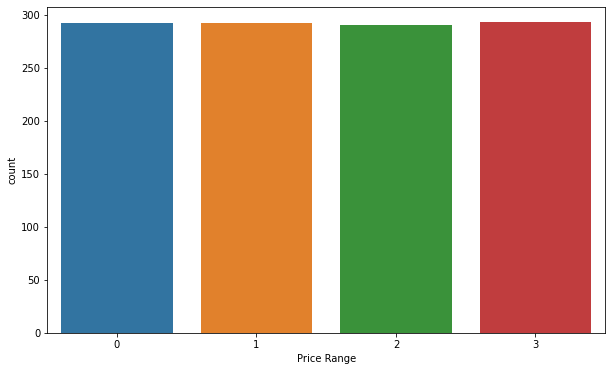

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1,x='Price Range')

## EDA

In [ ]:
def OS(x):
    return df[df['Operating System'] == x][['Price', 'Number of Sim Slots', 'Ratings',
       'Number Of Ratings', 'RAM', 'Storage', 'Expandable Storage', 'Front Camera1', 'Rear Camera1', 'Display Type', 'Battery_(mAh)']]

OS('Windows')

Price  Number of Sim Slots  Ratings  \
Model                                                          
MICROSOFT Lumia 435       6499                    2      4.1   
MICROSOFT Lumia 535 DS    5990                    2      3.9   
Nokia Lumia 610          12115                    1      3.9   
DELL Venue pro           16999                    1      4.3   
Nokia Lumia 625          17599                    1      4.1   

                         Number Of Ratings     RAM  Storage  \
Model                                                         
MICROSOFT Lumia 435                    332   1.000      8.0   
MICROSOFT Lumia 535 DS               18548   1.000      8.0   
Nokia Lumia 610                        334   0.256      8.0   
DELL Venue pro                          80  16.000     16.0   
Nokia Lumia 625                       1698   0.512      8.0   

                         Expandable Storage  Front Camera1  Rear Camera1  \
Model                                                                      
MICROSOFT Lumia 435                     128            0.3           2.0   
MICROSOFT Lumia 535 DS                  128            5.0           5.0   
Nokia Lumia 610                           0            0.0           5.0   
DELL Venue pro                            0            0.0           5.0   
Nokia Lumia 625                          64            0.3           5.0   

                                Display Type  Battery_(mAh)  
Model                                                        
MICROSOFT Lumia 435             WVGA Display           1560  
MICROSOFT Lumia 535 DS    quarter HD Display           1905  
Nokia Lumia 610                 WVGA Display           1300  
DELL Venue pro                  WVGA Display           1400  
Nokia Lumia 625                 WVGA Display           2000

In [ ]:
def OS(x):
    return df[df['Operating System'] == x][['Price', 'Number of Sim Slots', 'Ratings',
       'Number Of Ratings', 'RAM', 'Storage', 'Expandable Storage', 'Front Camera1', 'Rear Camera1', 'Display Type', 'Battery_(mAh)']]

OS('iOS')

Price  Number of Sim Slots  Ratings  \
Model                                                            
APPLE iPhone 5s            14999                    1      4.4   
APPLE IPhone 4             13999                    1      4.1   
APPLE iPhone 7             25099                    1      4.5   
APPLE iPhone 6s            25399                    1      4.5   
APPLE iPhone 13 Pro       149900                    2      4.6   
APPLE iPhone 6s Plus       33299                    1      4.4   
APPLE iPhone SE            58900                    2      4.3   
APPLE iPhone 13            99900                    2      4.6   
Apple iPhone XR            40499                    2      4.6   
Apple iPhone 11            54900                    2      4.6   
APPLE iPhone 13 Pro Max   126003                    2      4.6   
APPLE iPhone 12            59900                    2      4.6   
APPLE iPhone 12 Mini       55359                    2      4.5   
APPLE iPhone 13 Mini       74339                    2      4.5   
APPLE iPhone 12 Pro       139900                    2      4.5   

                          Number Of Ratings     RAM  Storage  \
Model                                                          
APPLE iPhone 5s                       62688  16.000     16.0   
APPLE IPhone 4                         1089   0.512      8.0   
APPLE iPhone 7                        94890  32.000     32.0   
APPLE iPhone 6s                       92994  32.000     32.0   
APPLE iPhone 13 Pro                     814   0.512    512.0   
APPLE iPhone 6s Plus                  18831  32.000     32.0   
APPLE iPhone SE                         531   0.256    256.0   
APPLE iPhone 13                       12280   0.512    512.0   
Apple iPhone XR                      100231  64.000     64.0   
Apple iPhone 11                       95730   4.000    128.0   
APPLE iPhone 13 Pro Max                1242   6.000    128.0   
APPLE iPhone 12                      181513   4.000     64.0   
APPLE iPhone 12 Mini                 101751   4.000     64.0   
APPLE iPhone 13 Mini                   2181   4.000    256.0   
APPLE iPhone 12 Pro                    1134   6.000    512.0   

                          Expandable Storage  Front Camera1  Rear Camera1  \
Model                                                                       
APPLE iPhone 5s                            0            1.2           8.0   
APPLE IPhone 4                             0            0.3           5.0   
APPLE iPhone 7                             0            7.0          12.0   
APPLE iPhone 6s                            0            5.0          12.0   
APPLE iPhone 13 Pro                        0           12.0          12.0   
APPLE iPhone 6s Plus                       0            5.0          12.0   
APPLE iPhone SE                            0            7.0          12.0   
APPLE iPhone 13                            0           12.0          12.0   
Apple iPhone XR                            0            7.0          12.0   
Apple iPhone 11                            0           12.0          12.0   
APPLE iPhone 13 Pro Max                    0           12.0          12.0   
APPLE iPhone 12                            0           12.0          12.0   
APPLE iPhone 12 Mini                       0           12.0          12.0   
APPLE iPhone 13 Mini                       0           12.0          12.0   
APPLE iPhone 12 Pro                        0           12.0          12.0   

                                       Display Type  Battery_(mAh)  
Model                                                               
APPLE iPhone 5s                      Retina Display           1560  
APPLE IPhone 4                           NA Display           1420  
APPLE iPhone 7                    Retina HD Display           1960  
APPLE iPhone 6s                   Retina HD Display           1715  
APPLE iPhone 13 Pro        Super Retina XDR Display           3095  
APPLE iPhone 6s Plus  

In [ ]:
def FiveG(x):
    return df[df['5G'] == x][['Price', 'Number of Sim Slots', 'Ratings',
       'Number Of Ratings', 'RAM', 'Storage', 'Expandable Storage', 'Front Camera1', 'Rear Camera1', 'Display Type', 'Battery_(mAh)']]

FiveG(1).head()

Price  Number of Sim Slots  Ratings  Number Of Ratings  \
Model                                                                        
realme 9 Pro 5G     16999                    2      4.3              44358   
realme 9 5G         15999                    2      4.4              15218   
MOTOROLA G51 5G     12249                    2      4.1              10022   
POCO M4 Pro 5G      14999                    2      4.2              22731   
REDMI Note 10T 5G   12999                    2      4.3              35878   

                    RAM  Storage  Expandable Storage  Front Camera1  \
Model                                                                 
realme 9 Pro 5G     6.0    128.0                 256           16.0   
realme 9 5G         6.0    128.0                1000           16.0   
MOTOROLA G51 5G     4.0     64.0                1000           13.0   
POCO M4 Pro 5G      6.0    128.0                1000           16.0   
REDMI Note 10T 5G   4.0     64.0                   0            8.0   

                    Rear Camera1       Display Type  Battery_(mAh)  
Model                                                               
realme 9 Pro 5G             64.0   Full HD+ Display           5000  
realme 9 5G                 48.0   Full HD+ Display           5000  
MOTOROLA G51 5G             50.0   Full HD+ Display           5000  
POCO M4 Pro 5G              50.0   Full HD+ Display           5000  
REDMI Note 10T 5G           48.0   Full HD+ Display           5000

In [ ]:
df.columns

Index(['Operating System', 'Brands', 'Number of Sim Slots', 'Ratings',
       'Number Of Ratings', 'Reviews', 'RAM', 'Storage', 'Expandable Storage',
       'Expandable or Not', 'Processor', 'Warranty', 'Price', 'Front Camera1',
       'Front Camera2', 'Number of Front Cameras', 'Display_Size',
       'Display Type', 'Battery_(mAh)', 'Battery_Type', 'Rear Camera1',
       'Rear Camera2', 'Rear Camera3', 'Rear Camera4',
       'Number Of Rear Cameras', 'FWVGA Display', 'WVGA Display',
       'HVGA Display', 'Normal Display', 'HD Display', 'Full HD Display',
       'quarter HD Display', 'HD+ Display', 'NA Display', 'FWVGA+ Display',
       'Full HD+ Display', 'QVGA Display', 'Quad HD+ Display',
       'Full HD+ AMOLED Display', 'Full HD+ Super AMOLED Display',
       'Retina Display', 'Retina HD Display', 'Super Retina XDR Display',
       'Full HD+ E3 Super AMOLED Display', 'Liquid Retina HD Display',
       'Quad HD Display', '5G', 'Android', 'Windows', 'iOS'],
      dtype='object')

In [ ]:
Range = df1['Price Range'].value_counts().to_frame()
Range.to_csv('Range.csv')

In [ ]:
Ratings = df1['Ratings'].value_counts().to_frame()
Ratings.to_csv('Ratings.csv')

In [ ]:
type = df['Display Type'].value_counts().to_frame()
type.to_csv('type.csv')

Correlation with Price

In [ ]:
correlated_features = set()
correlation_matrix = df1.corr()
corr_cols_order = df1.corr()['Price'].sort_values(ascending=False).index
corr_cols_order

Index(['Price', 'Storage', 'Super Retina XDR Display', 'Price Range', 'iOS',
       'Rear Camera3', 'Front Camera1', 'Rear Camera2', 'RAM', 'Ratings',
       'Number Of Rear Cameras', 'Rear Camera1', 'Display_Size', '5G',
       'Full HD+ Display', 'Battery_(mAh)', 'Rear Camera4', 'Quad HD Display',
       'Retina HD Display', 'Liquid Retina HD Display', 'Expandable Storage',
       'Quad HD+ Display', 'Front Camera2', 'Number of Front Cameras',
       'Full HD+ AMOLED Display', 'Full HD+ E3 Super AMOLED Display',
       'Full HD+ Super AMOLED Display', 'Number Of Ratings', 'Reviews',
       'Retina Display', 'Warranty', 'NA Display', 'Windows',
       'Full HD Display', 'Normal Display', 'QVGA Display', 'FWVGA+ Display',
       'quarter HD Display', 'HVGA Display', 'HD+ Display',
       'Number of Sim Slots', 'WVGA Display', 'FWVGA Display', 'HD Display',
       'Expandable or Not', 'Android'],
      dtype='object')

## Data Visualisation

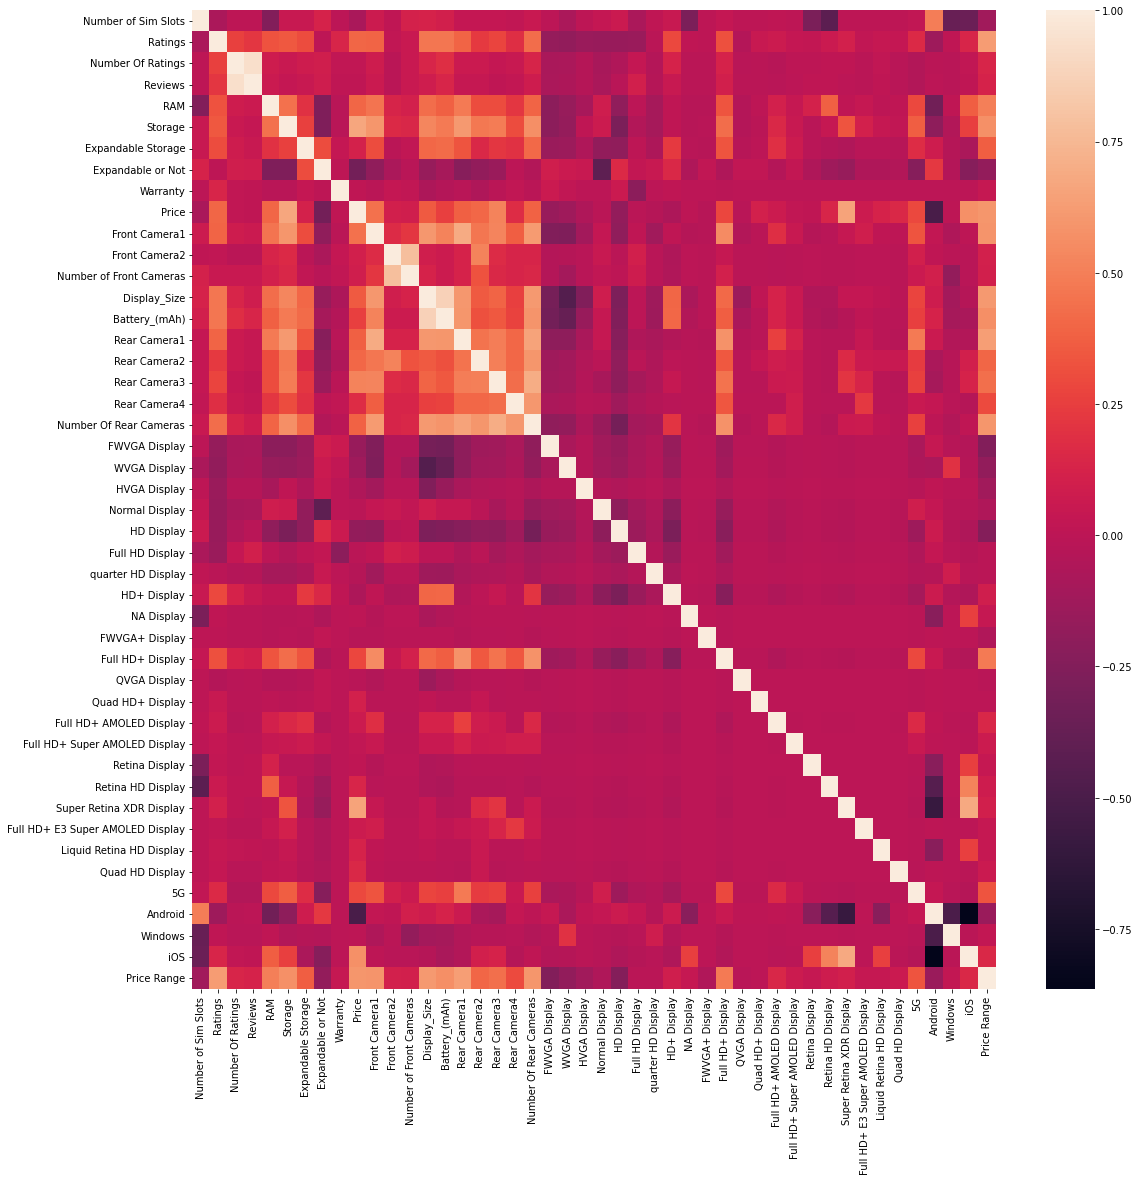

In [ ]:
import seaborn as sns
plt.subplots(figsize = (18, 18))
sns.heatmap(df1.corr())
plt.savefig('Heatmap.png')

In [ ]:
from PIL import Image
from wordcloud import STOPWORDS
mask = np.array(Image.open('mobile.png'))
nationality = " ".join(n for n in df['Brands'])
from wordcloud import WordCloud
plt.figure(figsize=(12,9))
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0]).generate(nationality)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('Wordmap.png')

FileNotFoundError: ignored

### Bar Chart

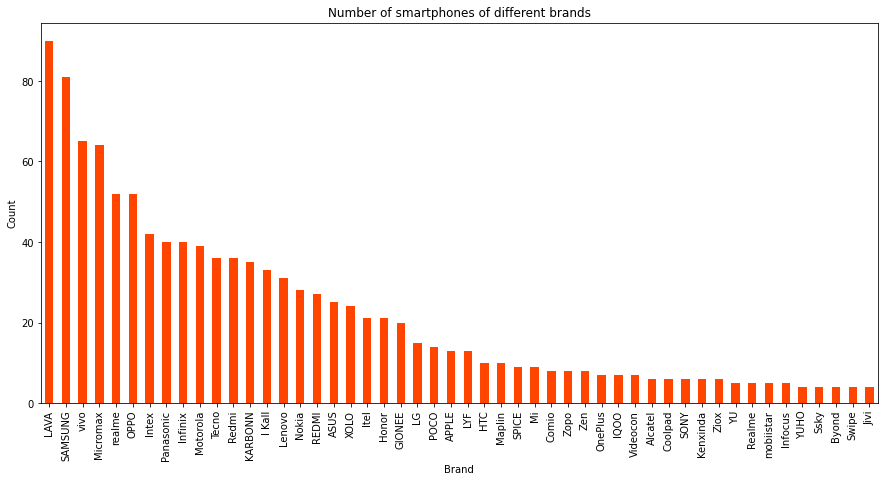

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize = (15,7))
df['Brands'].value_counts().head(50).plot.bar(color = 'orangered', grid=False)
plt.title('Number of smartphones of different brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()
plt.savefig('Barchart-Brands.png')

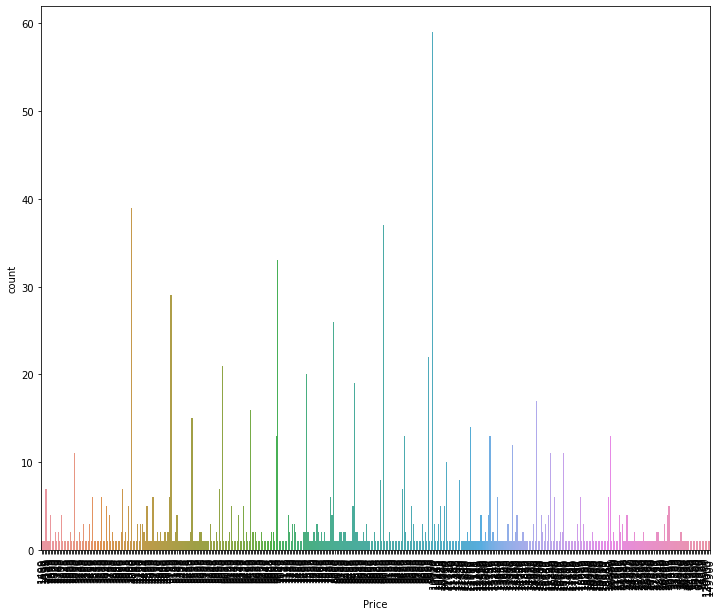

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(x=df['Price'])
plt.xticks(rotation=90);
plt.savefig('PriceRange.png')

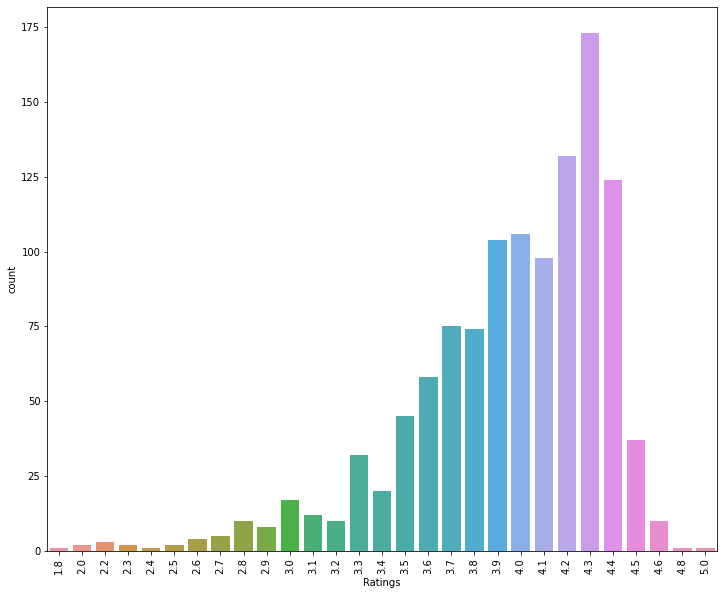

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(x=df['Ratings'])
plt.xticks(rotation=90);
plt.savefig('Ratingscount.png')

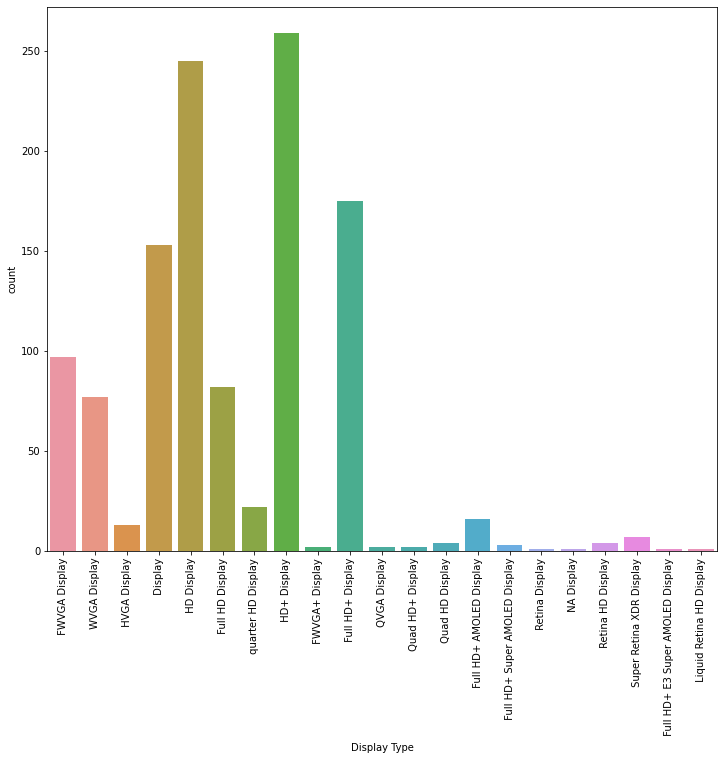

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(x=df['Display Type'])
plt.xticks(rotation=90);
plt.savefig('Displaysize.png')

### Histogram

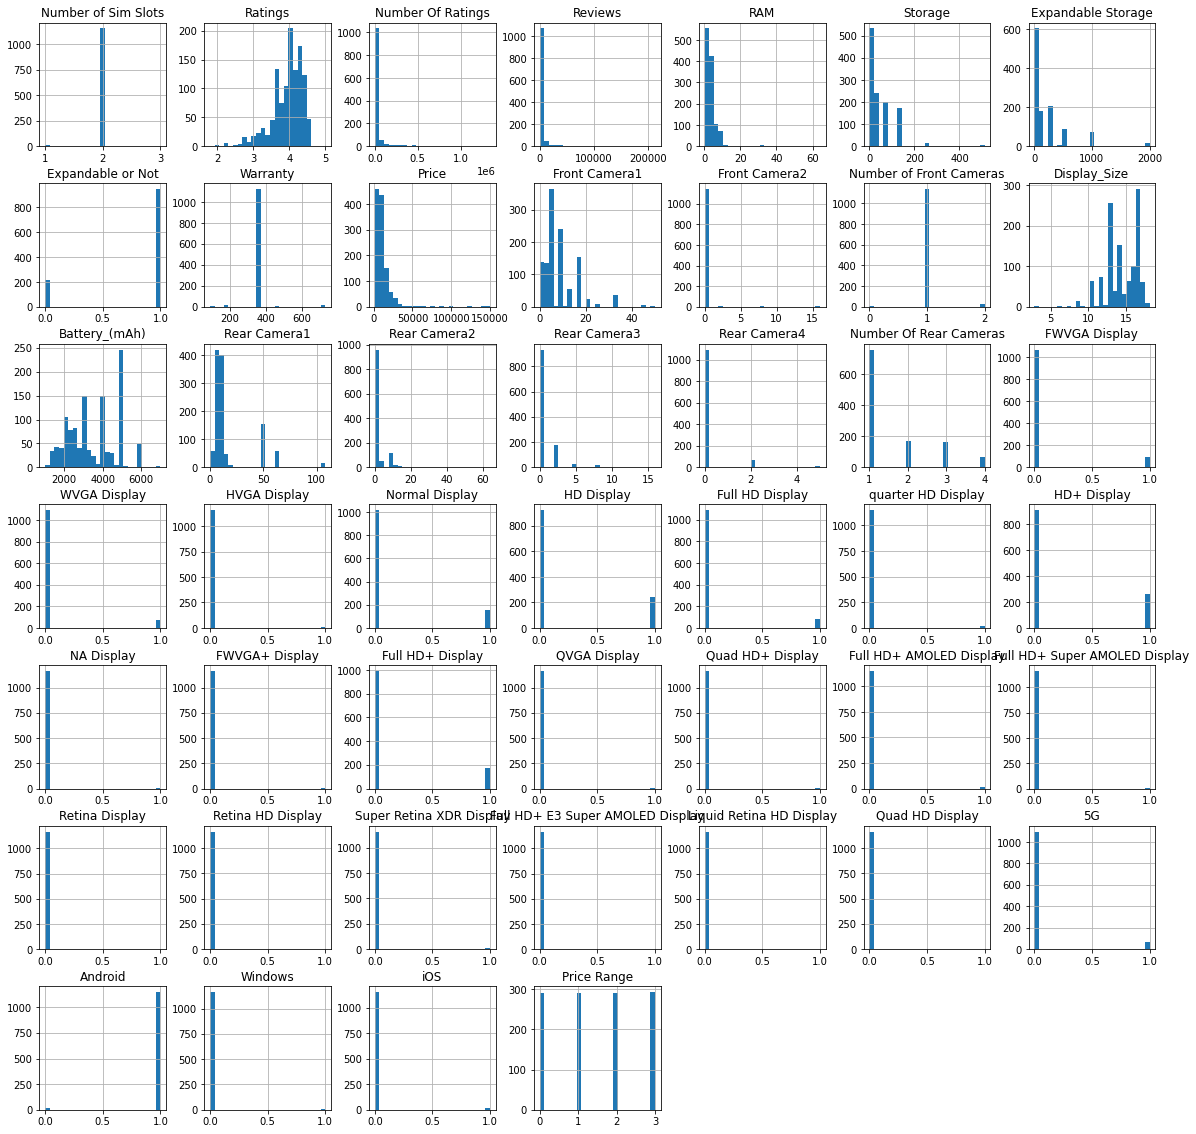

In [ ]:
df1.hist(bins=25,figsize=(20,20));

### Scatterplot

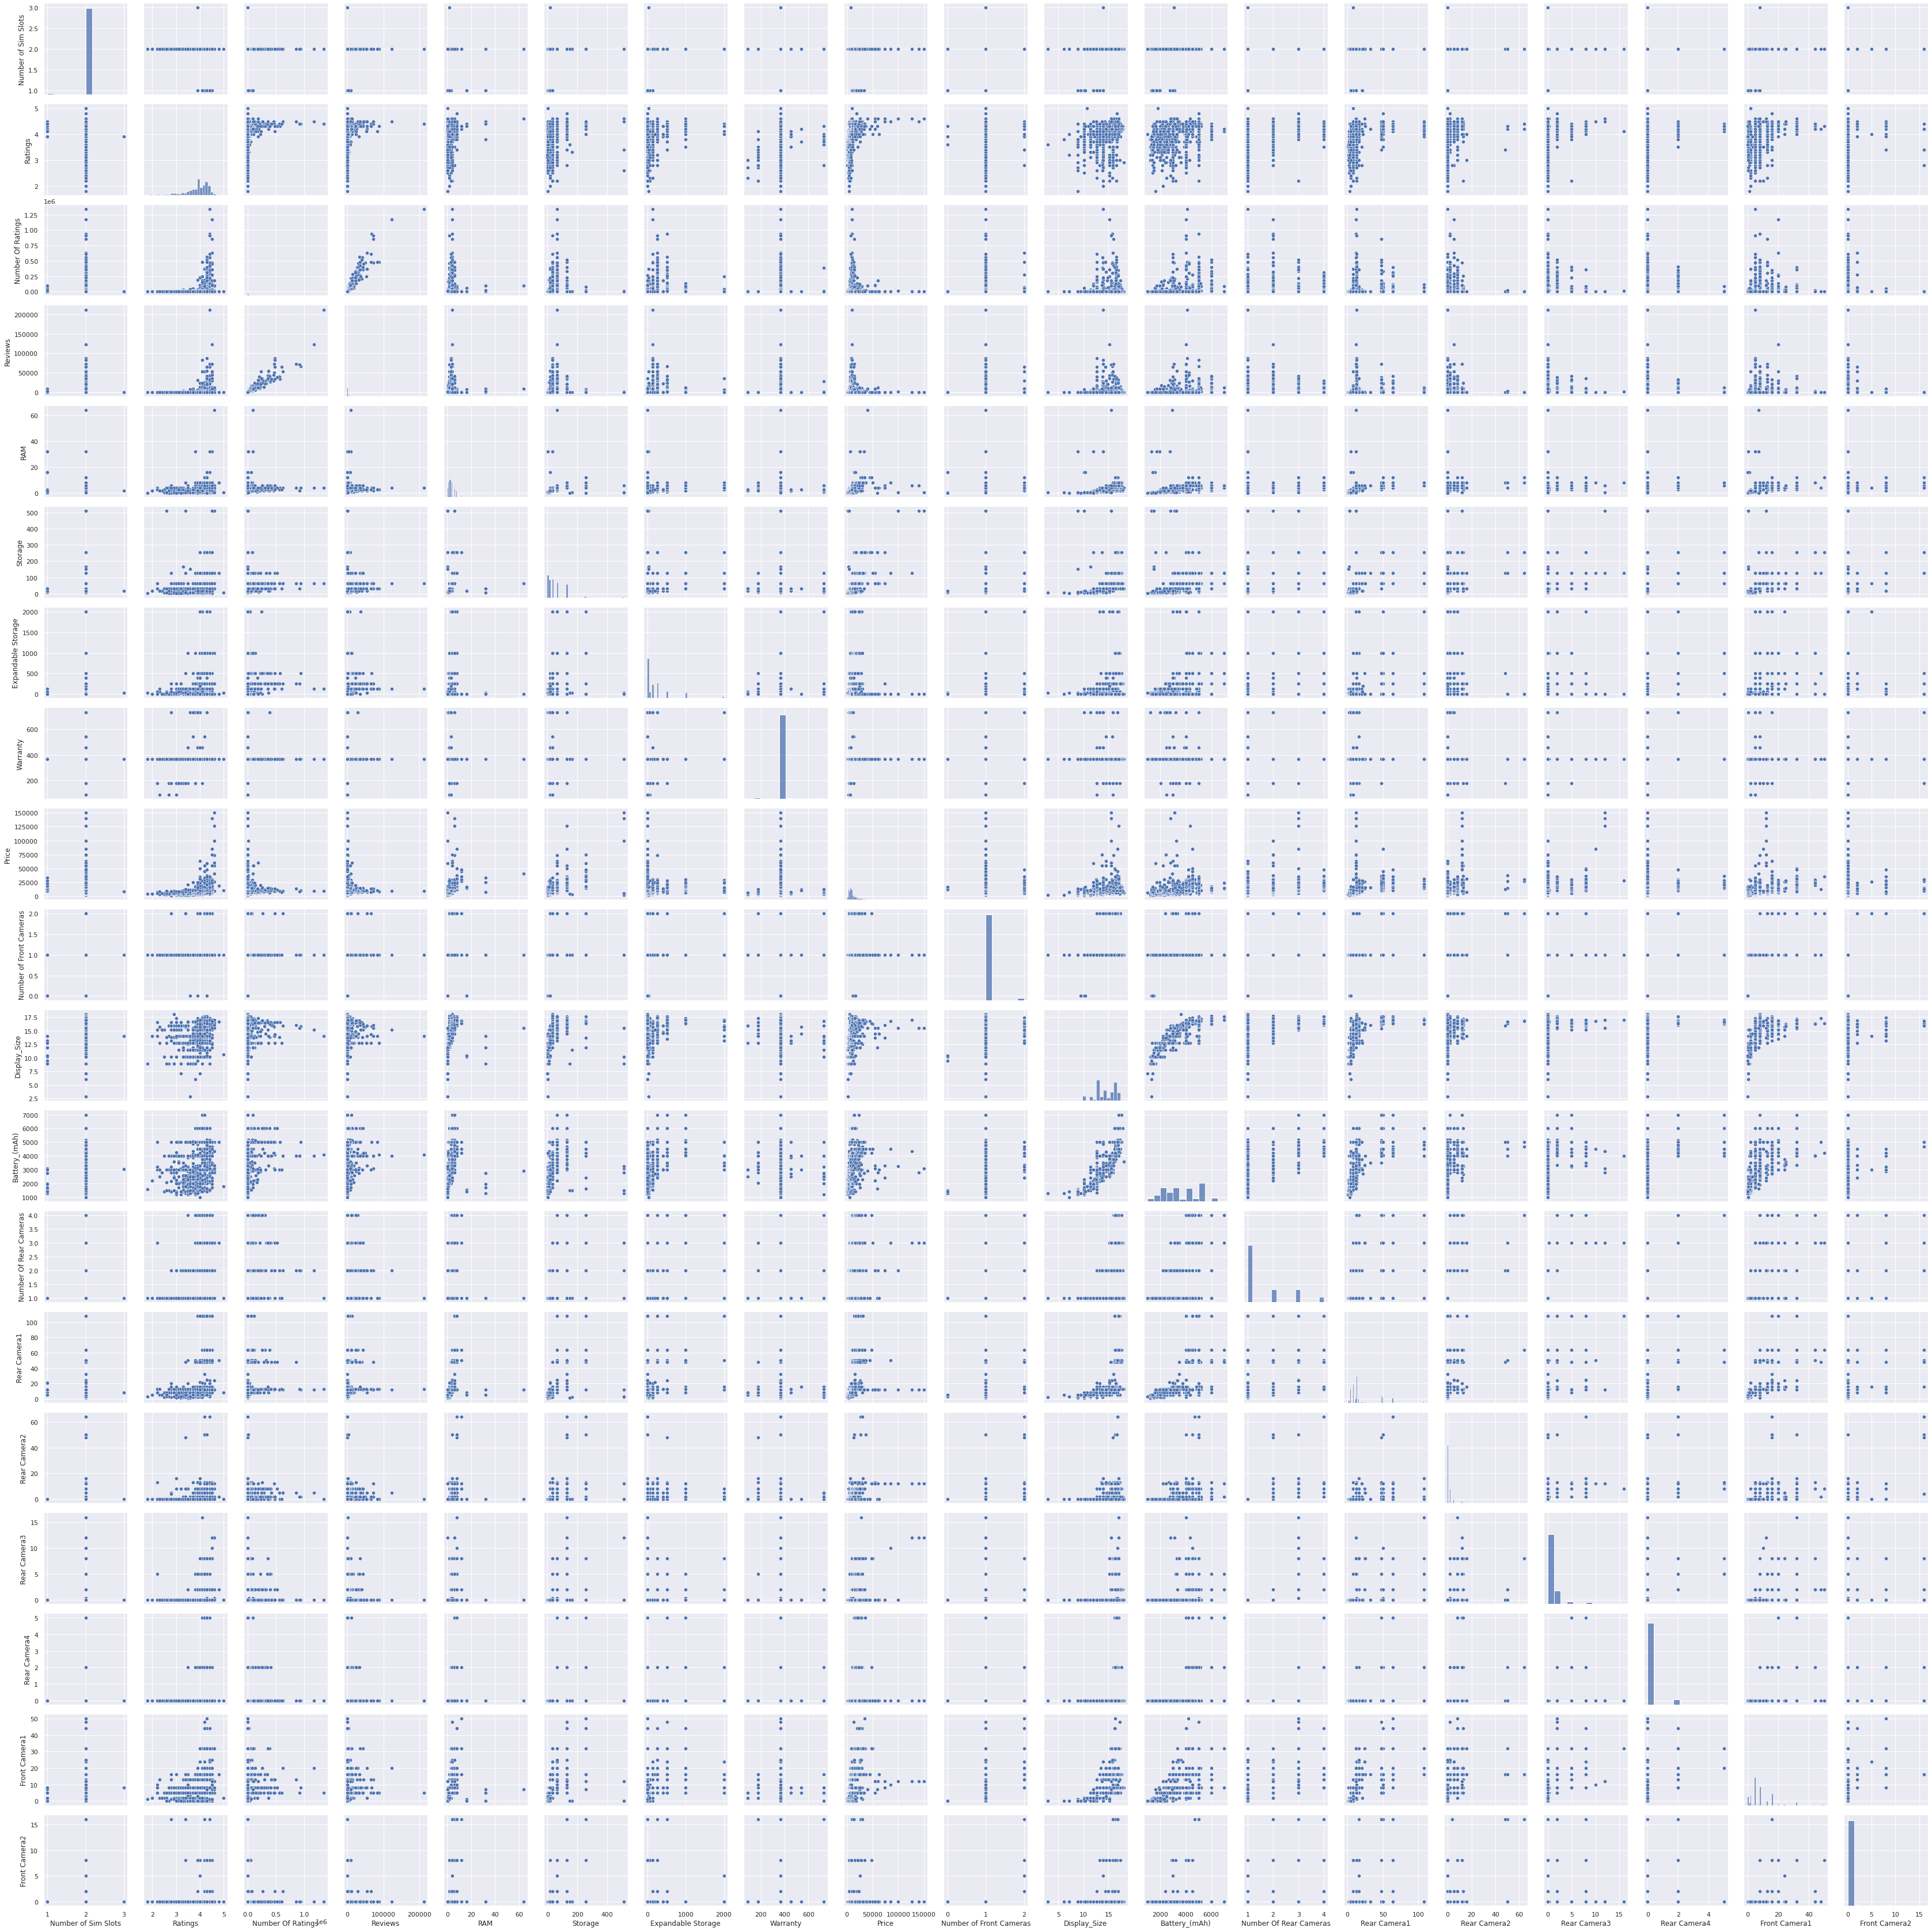

In [ ]:
sns.set()
cols = ['Number of Sim Slots', 'Ratings', 'Number Of Ratings', 'Reviews', 'RAM',
       'Storage', 'Expandable Storage', 'Warranty','Price', 'Number of Front Cameras',
       'Display_Size', 'Battery_(mAh)', 'Number Of Rear Cameras', 'Rear Camera1', 'Rear Camera2',
       'Rear Camera3', 'Rear Camera4', 'Front Camera1', 'Front Camera2'] 
sns.pairplot(df1[cols], height = 2.5)
plt.show()

#### Strong Positive Correlation

Number of Ratings and reviews, Display Size and Battery (mAh), RAM and Rear Camera1, Price and RAM, Rear Camera1 and Display Size, Front Camera1 and Display Size

[Text(0.5, 1.0, 'Number of Rating vs Reviews')]

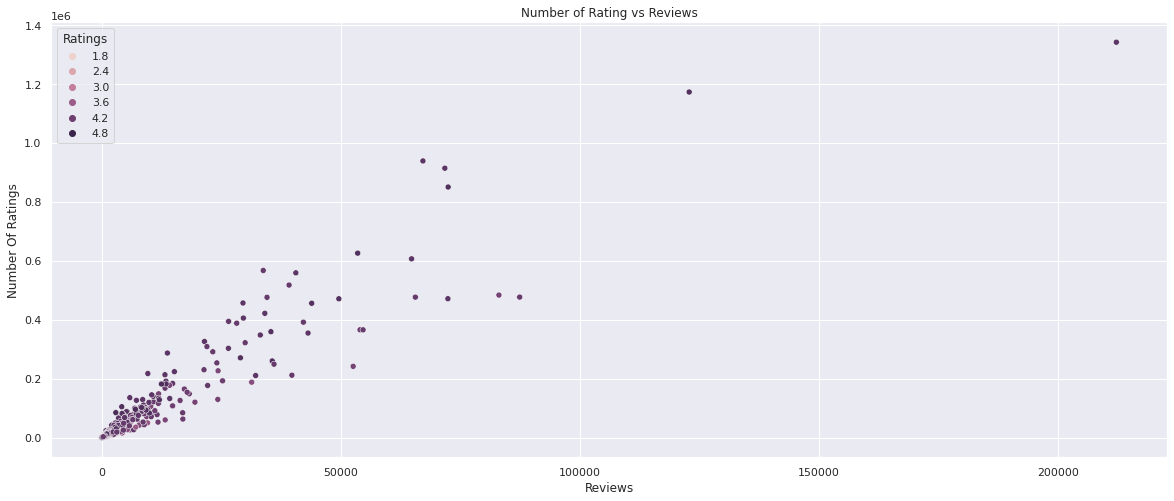

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.scatterplot(data=df, x='Reviews', y='Number Of Ratings', hue='Ratings').set(title='Number of Rating vs Reviews')

[Text(0.5, 1.0, 'Display Size vs Battery')]

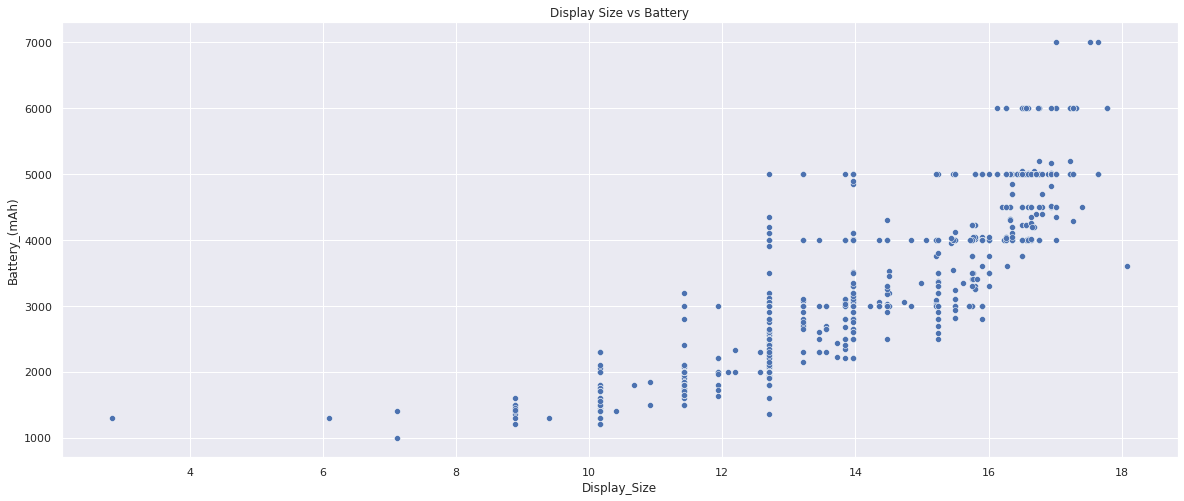

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.scatterplot(data=df, x='Display_Size', y='Battery_(mAh)').set(title='Display Size vs Battery')

[Text(0.5, 1.0, 'RAM vs Rear Camera')]

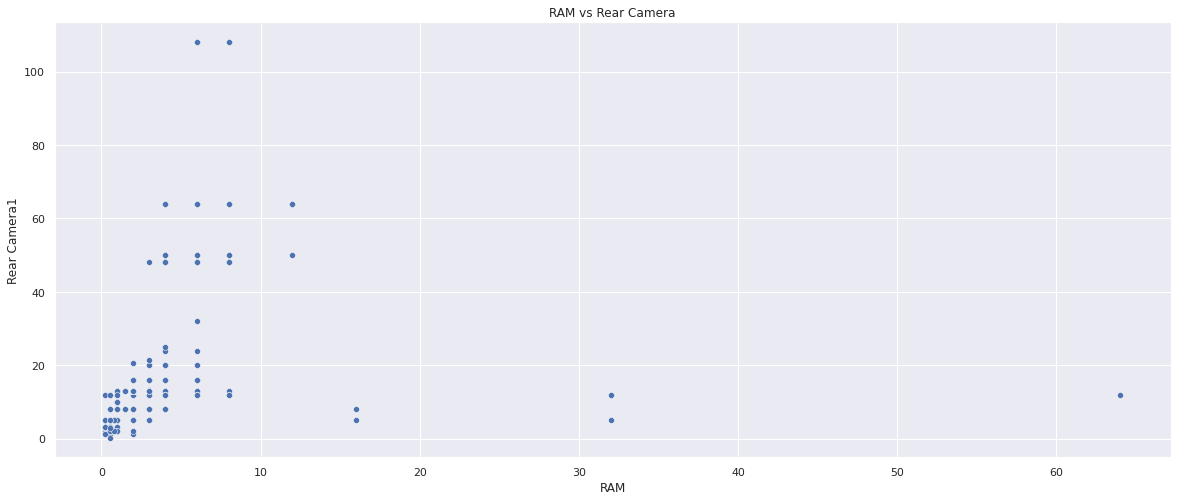

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.scatterplot(data=df, x='RAM', y='Rear Camera1').set(title='RAM vs Rear Camera')

[Text(0.5, 1.0, 'RAM vs Rear Camera')]

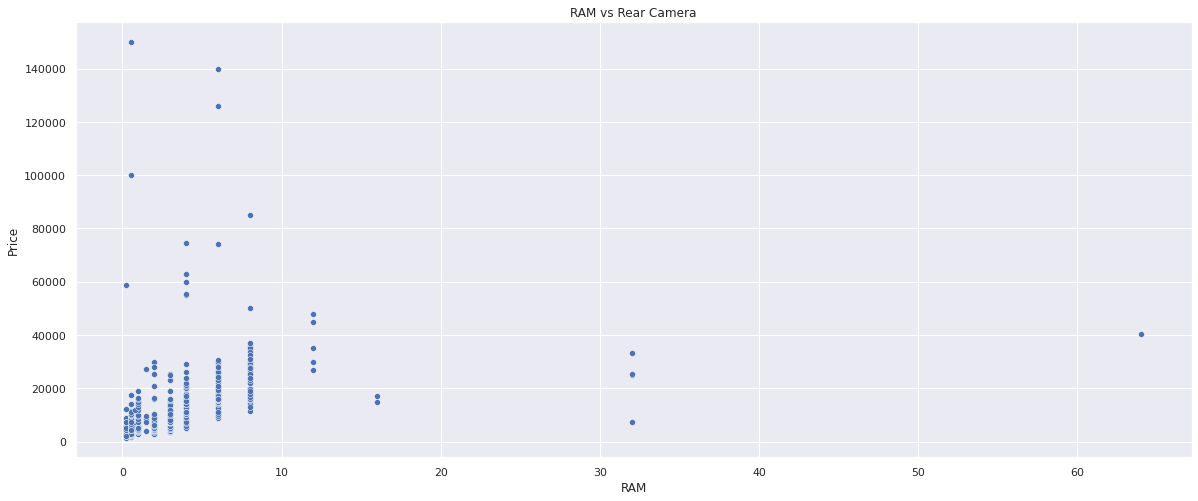

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.scatterplot(data=df, x='RAM', y='Price').set(title='RAM vs Rear Camera')

[Text(0.5, 1.0, 'Rear Camera vs Display Size')]

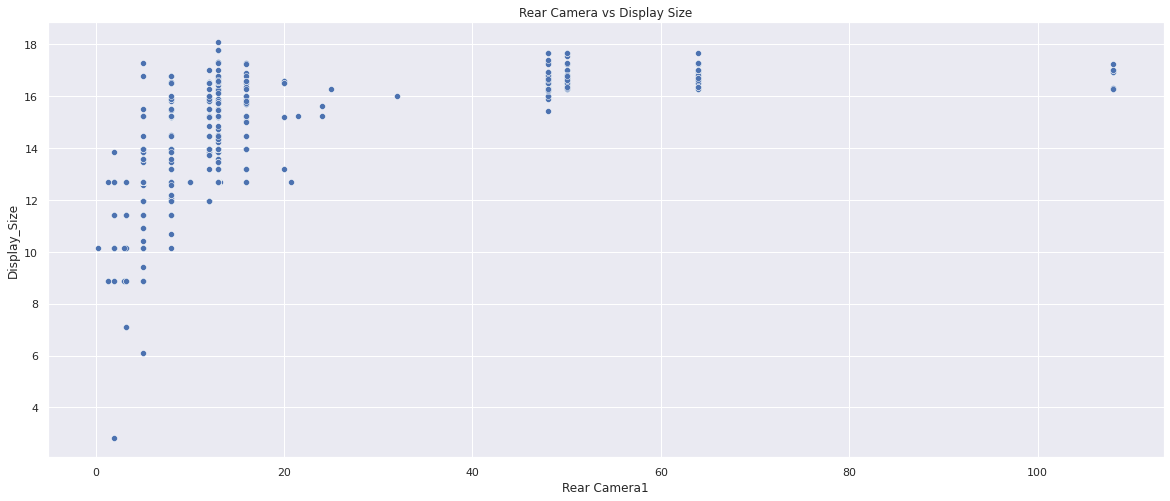

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.scatterplot(data=df, x='Rear Camera1', y='Display_Size').set(title='Rear Camera vs Display Size')

[Text(0.5, 1.0, 'Front Camera vs Display Size')]

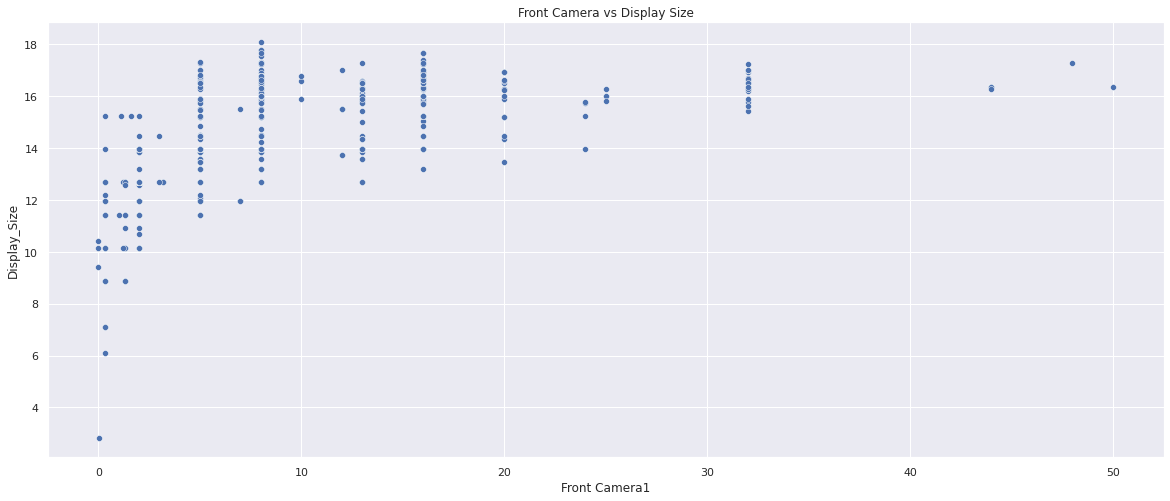

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.scatterplot(data=df, x='Front Camera1', y='Display_Size').set(title='Front Camera vs Display Size')

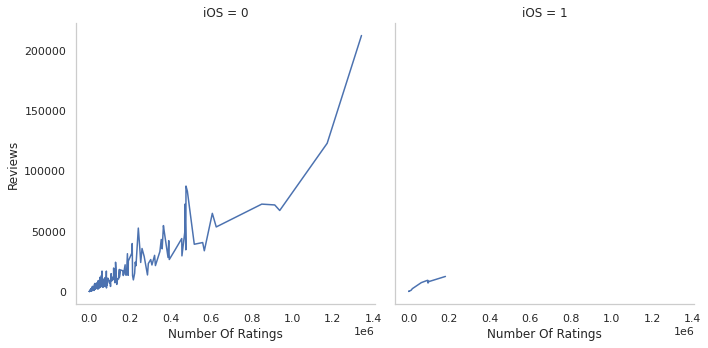

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.relplot(data=df1, x="Number Of Ratings", y="Reviews",col="iOS", kind='line')

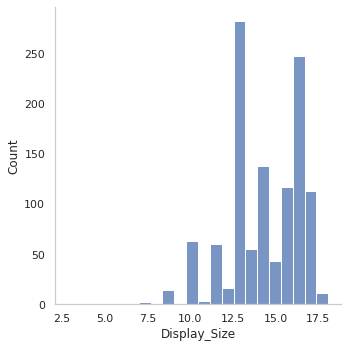

In [ ]:
sns.displot(data=df1, x="Display_Size")

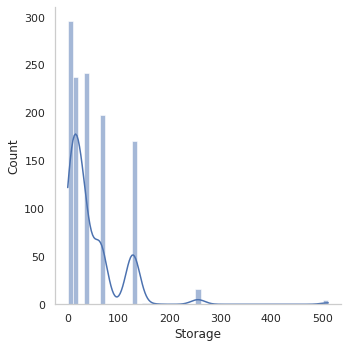

In [ ]:
sns.displot(data=df, x="Storage", kde=True)

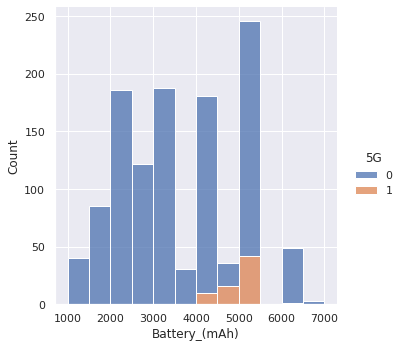

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.displot(data=df, x="Battery_(mAh)", hue="5G", multiple="stack")

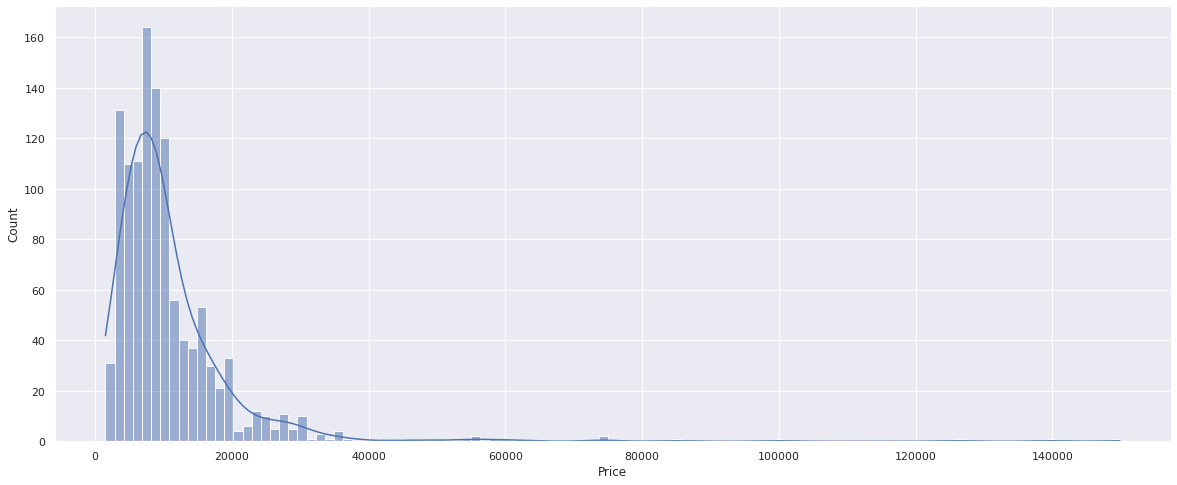

In [ ]:
sns.histplot(data=df, x="Price", kde=True)

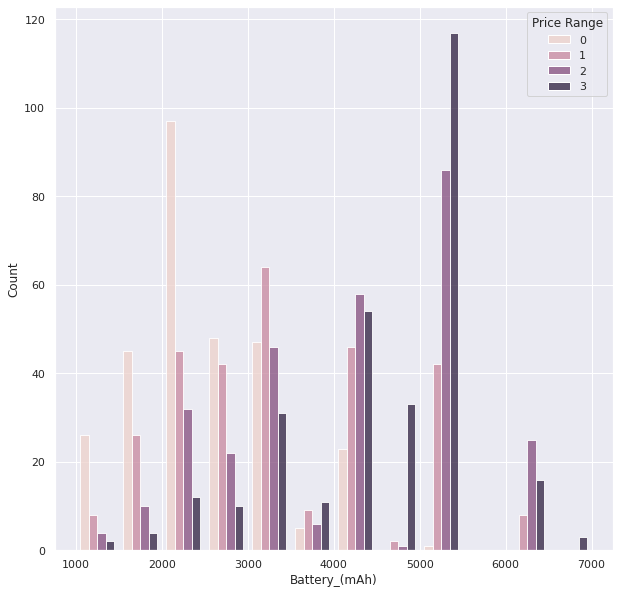

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot(data=df1, x="Battery_(mAh)", hue="Price Range", multiple="dodge", shrink=.8)

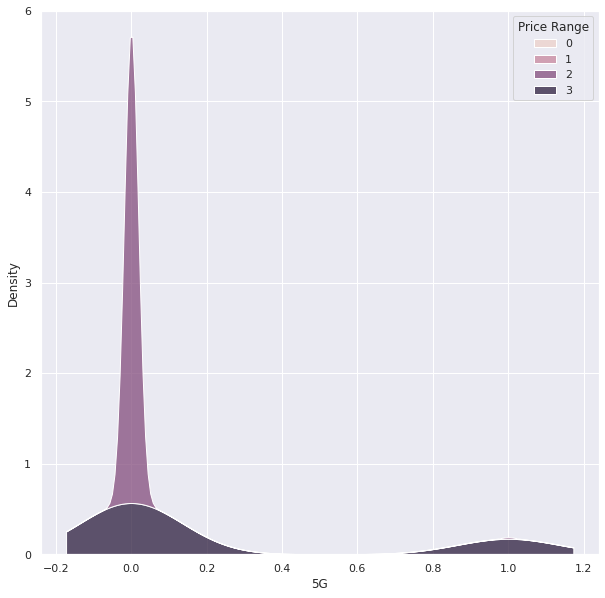

In [ ]:
sns.kdeplot(data=df1, x="5G", hue="Price Range", multiple="stack")

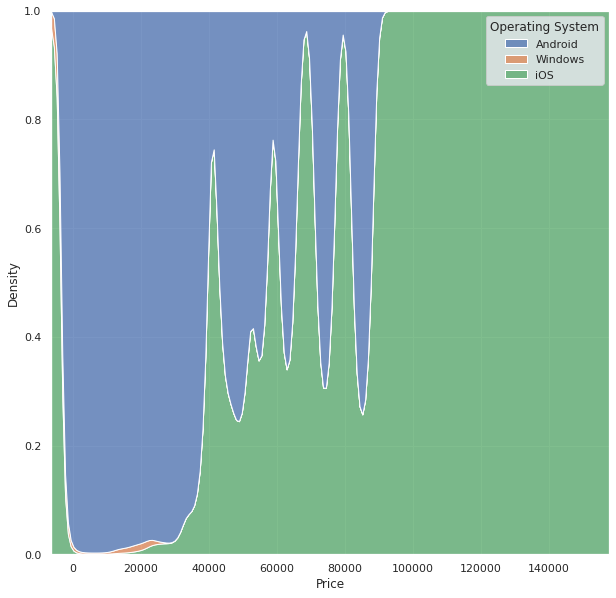

In [ ]:
sns.kdeplot(data=df, x="Price", hue="Operating System", multiple="fill")
plt.savefig('KDE Plot.png')

## Feature Scaling (Optionals)

### Standard Scaler

In [ ]:
df1.columns

Index(['Number of Sim Slots', 'Ratings', 'Number Of Ratings', 'Reviews', 'RAM',
       'Storage', 'Expandable Storage', 'Expandable or Not', 'Warranty',
       'Price', 'Front Camera1', 'Front Camera2', 'Number of Front Cameras',
       'Display_Size', 'Battery_(mAh)', 'Rear Camera1', 'Rear Camera2',
       'Rear Camera3', 'Rear Camera4', 'Number Of Rear Cameras',
       'FWVGA Display', 'WVGA Display', 'HVGA Display', 'Normal Display',
       'HD Display', 'Full HD Display', 'quarter HD Display', 'HD+ Display',
       'NA Display', 'FWVGA+ Display', 'Full HD+ Display', 'QVGA Display',
       'Quad HD+ Display', 'Full HD+ AMOLED Display',
       'Full HD+ Super AMOLED Display', 'Retina Display', 'Retina HD Display',
       'Super Retina XDR Display', 'Full HD+ E3 Super AMOLED Display',
       'Liquid Retina HD Display', 'Quad HD Display', '5G', 'Android',
       'Windows', 'iOS', 'Price Range'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df1)
df_scaled = scaler.transform(df1)
df_scaled = pd.DataFrame(df_scaled, columns = ['Number of Sim Slots', 'Ratings', 'Number Of Ratings', 'Reviews', 'RAM',
       'Storage', 'Expandable Storage', 'Expandable or Not', 'Warranty',
       'Price', 'Front Camera1', 'Front Camera2', 'Number of Front Cameras',
       'Display_Size', 'Battery_(mAh)', 'Rear Camera1', 'Rear Camera2',
       'Rear Camera3', 'Rear Camera4', 'Number Of Rear Cameras',
       'FWVGA Display', 'WVGA Display', 'HVGA Display', 'Normal Display',
       'HD Display', 'Full HD Display', 'quarter HD Display', 'HD+ Display',
       'NA Display', 'FWVGA+ Display', 'Full HD+ Display', 'QVGA Display',
       'Quad HD+ Display', 'Full HD+ AMOLED Display',
       'Full HD+ Super AMOLED Display', 'Retina Display', 'Retina HD Display',
       'Super Retina XDR Display', 'Full HD+ E3 Super AMOLED Display',
       'Liquid Retina HD Display', 'Quad HD Display', '5G', 'Android',
       'Windows', 'iOS', 'Price Range'])

In [ ]:
df_scaled.shape

(1167, 46)

In [ ]:
#df_scaled.drop(['Number Of Ratings', 'Reviews', 'Expandable Storage', 'Warranty'
#                , 'Android', 'Windows', 'Quad HD Display', 'Liquid Retina HD Display', 
#                'Rear Camera4', 'Rear Camera1'], axis = 1, inplace=True)

### Minmax Scaler

In [ ]:
scaler = preprocessing.MinMaxScaler().fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = ['Number of Sim Slots', 'Ratings', 'Number Of Ratings', 'Reviews', 'RAM',
       'Storage', 'Expandable Storage', 'Expandable or Not', 'Warranty',
       'Price', 'Front Camera1', 'Front Camera2', 'Number of Front Cameras',
       'Display_Size', 'Battery_(mAh)', 'Rear Camera1', 'Rear Camera2',
       'Rear Camera3', 'Rear Camera4', 'Rear Camera5',
       'Number Of Rear Cameras', 'FWVGA Display', 'WVGA Display',
       'HVGA Display', 'Normal Display', 'HD Display', 'Full HD Display',
       'quarter HD Display', 'HD+ Display', 'NA Display', 'FWVGA+ Display',
       'Full HD+ Display', 'QVGA Display', 'Quad HD+ Display',
       'Full HD+ AMOLED Display', 'Full HD+ Super AMOLED Display',
       'Retina Display', 'Retina HD Display', 'Super Retina XDR Display',
       'Full HD+ E3 Super AMOLED Display', 'Liquid Retina HD Display',
       'Quad HD Display', '5G', 'Price Range'])

ValueError: ignored

### Normalization

In [ ]:
scaler = preprocessing.Normalizer().fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = ['Number of Sim Slots', 'Ratings', 'Number Of Ratings', 'Reviews', 'RAM',
       'Storage', 'Expandable Storage', 'Expandable or Not', 'Warranty',
       'Price', 'Front Camera1', 'Front Camera2', 'Number of Front Cameras',
       'Display_Size', 'Battery_(mAh)', 'Rear Camera1', 'Rear Camera2',
       'Rear Camera3', 'Rear Camera4', 'Rear Camera5',
       'Number Of Rear Cameras', 'FWVGA Display', 'WVGA Display',
       'HVGA Display', 'Normal Display', 'HD Display', 'Full HD Display',
       'quarter HD Display', 'HD+ Display', 'NA Display', 'FWVGA+ Display',
       'Full HD+ Display', 'QVGA Display', 'Quad HD+ Display',
       'Full HD+ AMOLED Display', 'Full HD+ Super AMOLED Display',
       'Retina Display', 'Retina HD Display', 'Super Retina XDR Display',
       'Full HD+ E3 Super AMOLED Display', 'Liquid Retina HD Display',
       'Quad HD Display', '5G'])

## Data Split

In [ ]:
X = df1.drop(['Price', 'Price Range'],axis=1)
y = df1['Price']
#X = df_scaled.drop(['Price', 'Price Range'],axis=1)
#y = df_scaled['Price']
#y = df1['Price Range']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Dimensionality Reduction

### Feature Selection

#### ANOVA

In [ ]:
import sklearn.feature_selection
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
Values = f_regression(X, y, center=True)

In [ ]:
Values

In [ ]:
X_new = SelectKBest(f_regression, k=40).fit_transform(X, y)

## Modelling

## Regression

### Linear Regression

#### Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
reg = LinearRegression()
reg.get_params()
#fitintercept = [True, False]

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
copy_x = [True, False]
#postive = [True, False]
njobs = [-1]
param_grid = {
              'n_jobs': njobs}
grid = GridSearchCV(estimator=reg, 
                    param_grid=param_grid, 
                    cv = 10, 
                    scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(), param_grid={'n_jobs': [-1]},
             scoring='r2')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print("Best Parameters", grid.best_params_)
pred = grid.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)

Best Parameters {'n_jobs': -1}
R2:  0.8389659302375592
Root Mean Squared Error:  5351.958857760254


In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
y_test.shape

In [ ]:
# multiple lines with legend
plt.figure(figsize=(23, 9))
plt.plot(np.arange(1,235),y_test,marker='.', color='b', label= 'Actual Value')
plt.plot(np.arange(1,235),pred, marker = '+', color = 'g',label = 'Predicted Value')
plt.xlabel("Index to Mobiles")
plt.ylabel("Actual and Predicted Value")
plt.title("Actual and Predicted Price Using Linear Regression ")
plt.legend();

### Random Forest Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

RFR = RandomForestRegressor()
RFR.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {'bootstrap': [True], 
              'max_depth': [9],
              'max_features': ['auto'],              
              'n_estimators': [20]}
grid = GridSearchCV(estimator=RFR, 
                    param_grid=param_grid, 
                    cv = 9, 
                    scoring='r2')
grid.fit(X_train, y_train)
#param_grid = {'bootstrap': [True], 
#              'max_depth': [9],
#              'max_features': [1.0, 'auto', 'log2'],              
#              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 20,100]}

GridSearchCV(cv=9, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [9],
                         'max_features': ['auto'], 'n_estimators': [20]},
             scoring='r2')

In [ ]:
print("Best Parameters", grid.best_params_)
pred = grid.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)

Best Parameters {'bootstrap': True, 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 20}
R2:  0.8838191289742048
Root Mean Squared Error:  4545.913794837383


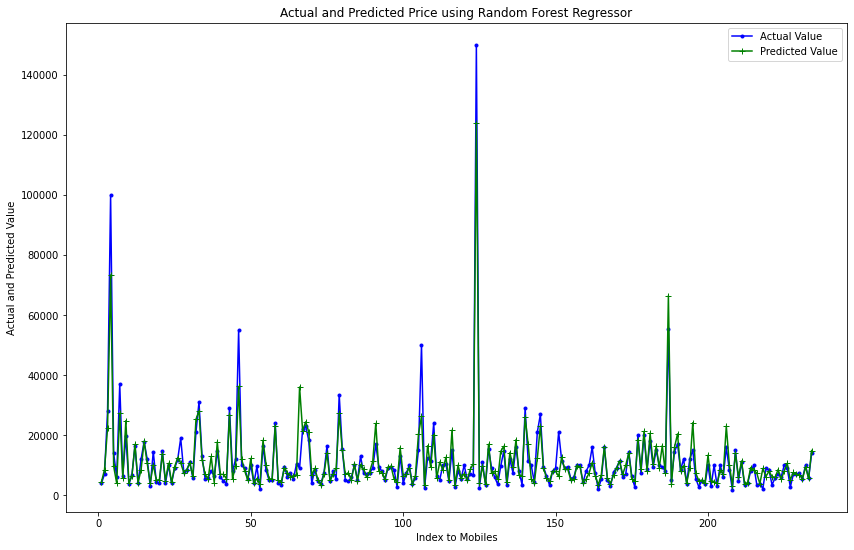

In [ ]:
# multiple lines with legend
plt.figure(figsize=(14, 9))
plt.plot(np.arange(1,235),y_test,marker='.', color='b', label= 'Actual Value')
plt.plot(np.arange(1,235),pred, marker = '+', color = 'g',label = 'Predicted Value')
plt.xlabel("Index to Mobiles")
plt.ylabel("Actual and Predicted Value")
plt.title("Actual and Predicted Price using Random Forest Regressor")
plt.legend();
plt.savefig('Actual and predicted.png')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

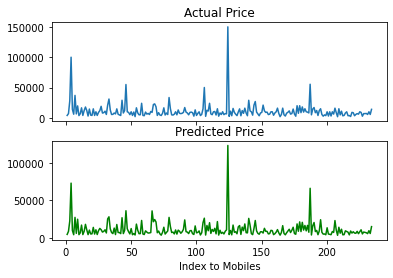

In [ ]:
fig = plt.figure()
plt.figure(figsize=(20,20))
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(np.arange(1,235), y_test)
ax2.plot(np.arange(1,235), pred, 'g')
ax1.set_title("Actual Price")
ax2.set_title("Predicted Price")
plt.xlabel("Index to Mobiles")
plt.savefig('Subplots.png')

In [ ]:
a, b = np.polyfit(y_test, pred, 1)

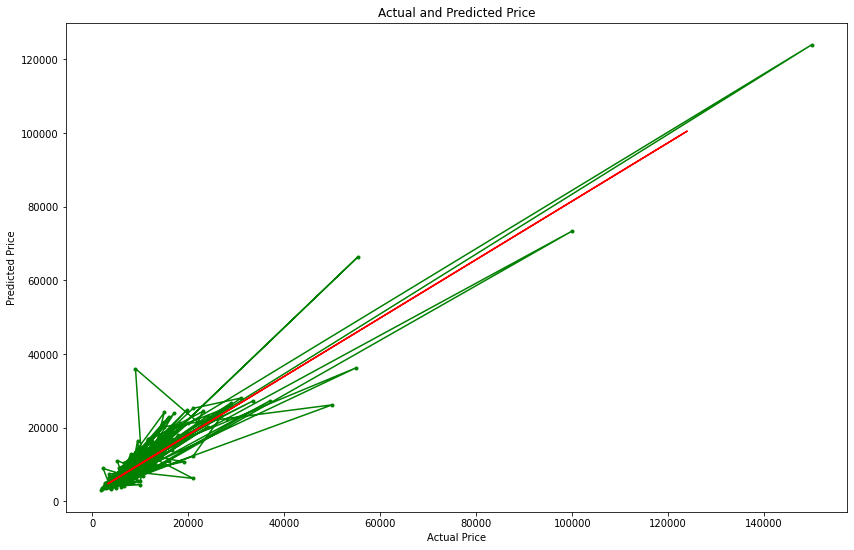

In [ ]:
plt.figure(figsize=(14, 9))
plt.plot(y_test, pred,marker='.', color='g')
plt.plot(pred, a*pred+b, 'r') 
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual and Predicted Price")
plt.savefig('Predicted bs actual.png')

#### Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
print('MEA :',mean_absolute_error(y_test, pred))
print('R2  :',r2_score(y_test, pred))
print('MSE :',(mean_squared_error(y_test, pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('MAPE :',mean_absolute_percentage_error(y_test, pred))

MEA : 2357.942047574173
R2  : 0.8838191289742048
MSE : 20665332.230092816
RMSE : 4545.913794837383
MAPE : 0.24245014617116656


#### Best Estimator

In [ ]:
grid.best_estimator_.base_estimator_

DecisionTreeRegressor()

In [ ]:
grid.best_estimator_.estimators_

[DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=1270033403),
 DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=1443337206),
 DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=1845927431),
 DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=1637401526),
 DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=1157878826),
 DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=1796348705),
 DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=710365040),
 DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=474921960),
 DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=525515335),
 DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=561451507),
 DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=355851873),
 DecisionTreeRegressor(max_depth=9, max_features=1.0, random_state=848558235),
 DecisionTreeRegressor(max_depth=9, max_featur

In [ ]:
grid.best_estimator_.n_features_in_

44

In [ ]:
grid.best_estimator_.feature_names_in_

array(['Number of Sim Slots', 'Ratings', 'Number Of Ratings', 'Reviews',
       'RAM', 'Storage', 'Expandable Storage', 'Expandable or Not',
       'Warranty', 'Front Camera1', 'Front Camera2',
       'Number of Front Cameras', 'Display_Size', 'Battery_(mAh)',
       'Rear Camera1', 'Rear Camera2', 'Rear Camera3', 'Rear Camera4',
       'Number Of Rear Cameras', 'FWVGA Display', 'WVGA Display',
       'HVGA Display', 'Normal Display', 'HD Display', 'Full HD Display',
       'quarter HD Display', 'HD+ Display', 'NA Display',
       'FWVGA+ Display', 'Full HD+ Display', 'QVGA Display',
       'Quad HD+ Display', 'Full HD+ AMOLED Display',
       'Full HD+ Super AMOLED Display', 'Retina Display',
       'Retina HD Display', 'Super Retina XDR Display',
       'Full HD+ E3 Super AMOLED Display', 'Liquid Retina HD Display',
       'Quad HD Display', '5G', 'Android', 'Windows', 'iOS'], dtype=object)

In [ ]:
grid.best_estimator_.n_outputs_

1

In [ ]:
importance_gb = grid.best_estimator_.feature_importances_
importance_gb

array([1.63068532e-03, 4.79500321e-02, 1.80783782e-02, 1.52415921e-02,
       2.22917620e-01, 4.65747226e-02, 5.16494082e-03, 3.43001404e-04,
       3.12994595e-04, 3.95153095e-02, 9.18417894e-04, 1.08343875e-04,
       9.17508432e-03, 4.44413500e-02, 4.64680032e-02, 4.22317213e-02,
       1.12597424e-01, 2.69239639e-04, 1.01302337e-03, 1.04514841e-04,
       1.74113777e-05, 1.14210106e-04, 1.65413533e-03, 2.67036878e-04,
       4.11944430e-03, 5.71637026e-05, 2.31776302e-04, 0.00000000e+00,
       0.00000000e+00, 1.11974957e-03, 0.00000000e+00, 2.03349945e-02,
       7.53316188e-04, 0.00000000e+00, 0.00000000e+00, 4.67934006e-03,
       2.17142568e-01, 0.00000000e+00, 0.00000000e+00, 5.60047493e-02,
       3.03259053e-03, 1.18881170e-02, 1.18291209e-04, 2.34087056e-02])

In [ ]:
X_train.columns

Index(['Number of Sim Slots', 'Ratings', 'Number Of Ratings', 'Reviews', 'RAM',
       'Storage', 'Expandable Storage', 'Expandable or Not', 'Warranty',
       'Front Camera1', 'Front Camera2', 'Number of Front Cameras',
       'Display_Size', 'Battery_(mAh)', 'Rear Camera1', 'Rear Camera2',
       'Rear Camera3', 'Rear Camera4', 'Number Of Rear Cameras',
       'FWVGA Display', 'WVGA Display', 'HVGA Display', 'Normal Display',
       'HD Display', 'Full HD Display', 'quarter HD Display', 'HD+ Display',
       'NA Display', 'FWVGA+ Display', 'Full HD+ Display', 'QVGA Display',
       'Quad HD+ Display', 'Full HD+ AMOLED Display',
       'Full HD+ Super AMOLED Display', 'Retina Display', 'Retina HD Display',
       'Super Retina XDR Display', 'Full HD+ E3 Super AMOLED Display',
       'Liquid Retina HD Display', 'Quad HD Display', '5G', 'Android',
       'Windows', 'iOS'],
      dtype='object')

In [ ]:
columns = X_train.columns
#Combine columns with feature importances
gbGraph = pd.Series(importance_gb, columns)
gbGraph

Number of Sim Slots                 0.004500
Ratings                             0.033907
Number Of Ratings                   0.010759
Reviews                             0.005890
RAM                                 0.163229
Storage                             0.104777
Expandable Storage                  0.005771
Expandable or Not                   0.000284
Warranty                            0.000151
Front Camera1                       0.020229
Front Camera2                       0.000066
Number of Front Cameras             0.000139
Display_Size                        0.011914
Battery_(mAh)                       0.037906
Rear Camera1                        0.035631
Rear Camera2                        0.027255
Rear Camera3                        0.205880
Rear Camera4                        0.000693
Number Of Rear Cameras              0.008327
FWVGA Display                       0.000089
WVGA Display                        0.000375
HVGA Display                        0.000042
Normal Dis

In [ ]:
gbGraph.sort_values()

Liquid Retina HD Display            0.000000
Retina Display                      0.000000
Full HD+ Super AMOLED Display       0.000000
FWVGA+ Display                      0.000000
QVGA Display                        0.000003
NA Display                          0.000009
HVGA Display                        0.000042
Front Camera2                       0.000066
Windows                             0.000079
FWVGA Display                       0.000089
Full HD+ E3 Super AMOLED Display    0.000103
Number of Front Cameras             0.000139
Warranty                            0.000151
Expandable or Not                   0.000284
HD Display                          0.000326
WVGA Display                        0.000375
Full HD+ AMOLED Display             0.000430
quarter HD Display                  0.000503
Rear Camera4                        0.000693
HD+ Display                         0.000778
Normal Display                      0.001053
Full HD+ Display                    0.002050
5G        

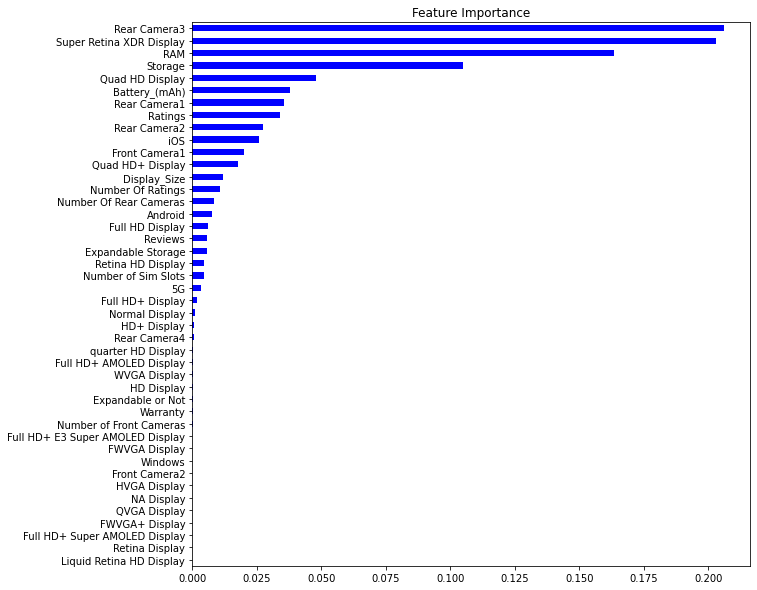

In [ ]:
# Visualizing importance from our model

from matplotlib.pyplot import figure
figure(figsize = (10,10))
gbGraph.sort_values().plot.barh(color='b')
plt.title('Feature Importance')
plt.savefig('Feature Importance.png')

In [ ]:
len(grid.best_estimator_.estimators_)

20

In [ ]:
# first decision tree of the random forest
grid.best_estimator_.estimators_[0]

DecisionTreeRegressor(max_depth=9, max_features='log2', random_state=340426938)

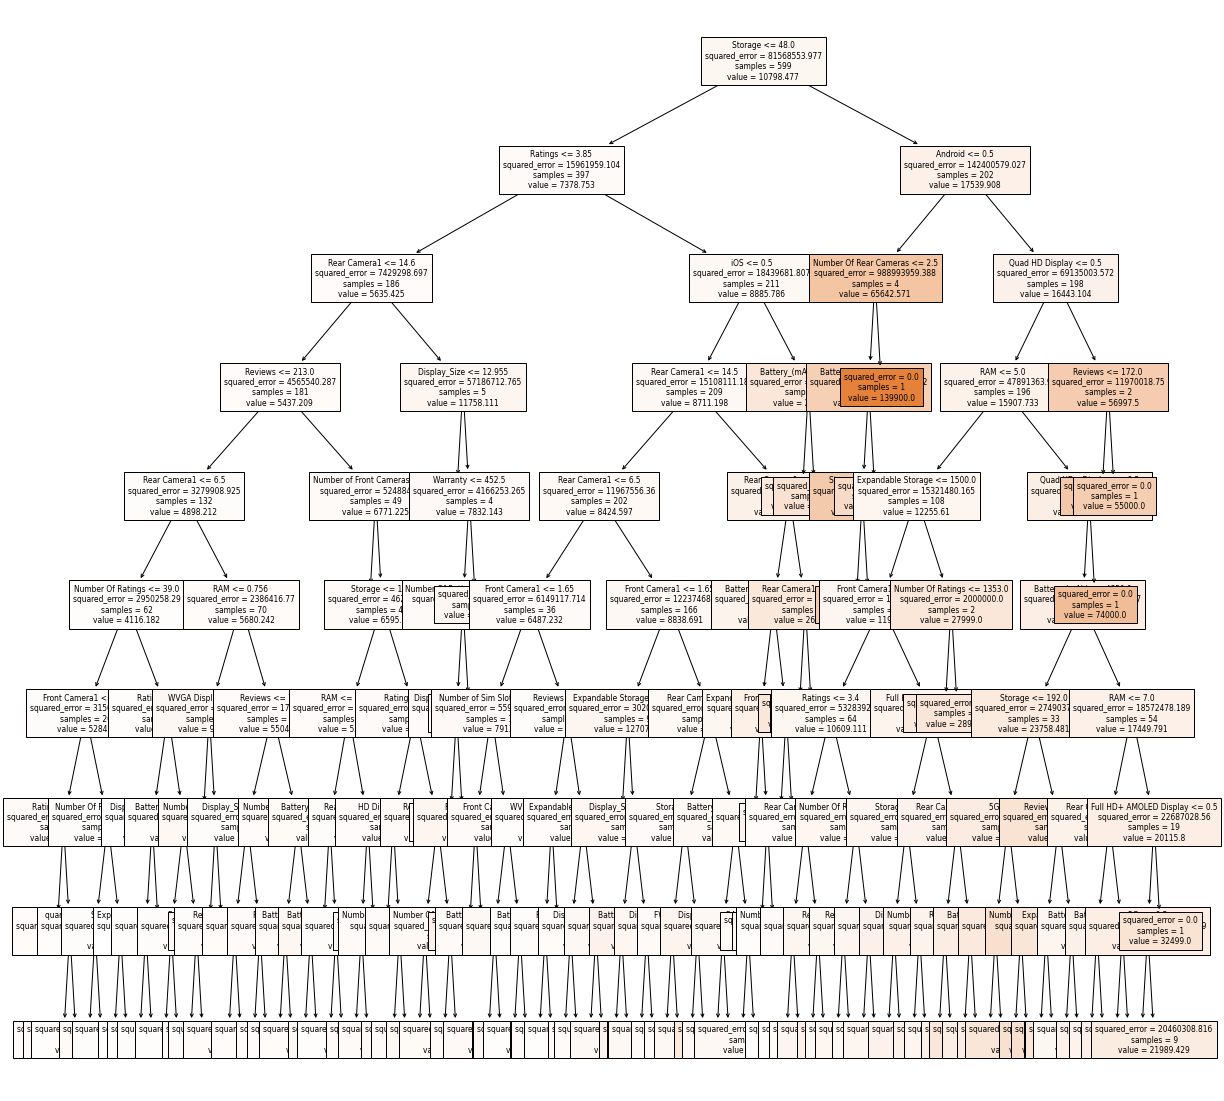

In [ ]:
#We can plot a first Decision Tree from the Random Forest
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(grid.best_estimator_.estimators_[0], feature_names=X_train.columns, filled=True, fontsize=7.5)
plt.savefig('First Decision Tree.png')

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
DTR = DecisionTreeRegressor()
DTR.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
param_grid={"max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":[None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
grid = GridSearchCV(estimator=DTR, 
                    param_grid=param_grid, 
                    cv = 10, 
                    scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': [None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='r2')

In [ ]:
print("Best Parameters", grid.best_params_)
pred = grid.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)

Best Parameters {'max_depth': 12, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 1}
R2:  0.7767603527890284
Root Mean Squared Error:  6301.436229301065


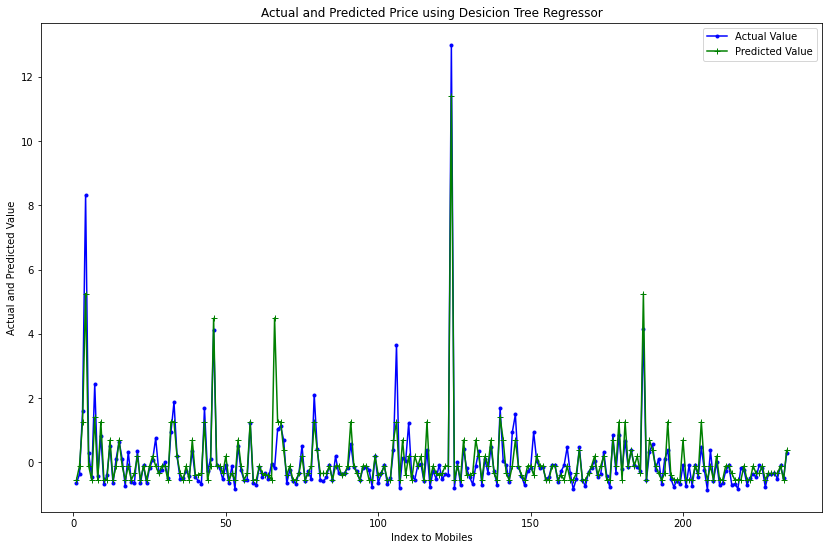

In [ ]:
# multiple lines with legend
plt.figure(figsize=(14, 9))
plt.plot(np.arange(1,235),y_test,marker='.', color='b', label= 'Actual Value')
plt.plot(np.arange(1,235),pred, marker = '+', color = 'g',label = 'Predicted Value')
plt.xlabel("Index to Mobiles")
plt.ylabel("Actual and Predicted Value")
plt.title("Actual and Predicted Price using Desicion Tree Regressor")
plt.legend();
plt.savefig('Actual and predicted.png')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

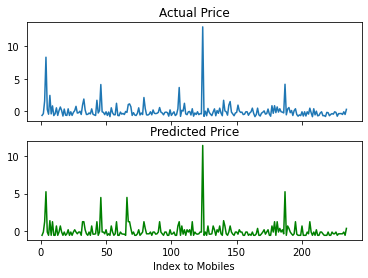

In [ ]:
fig = plt.figure()
plt.figure(figsize=(20,20))
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(np.arange(1,235), y_test)
ax2.plot(np.arange(1,235), pred, 'g')
ax1.set_title("Actual Price")
ax2.set_title("Predicted Price")
plt.xlabel("Index to Mobiles")
plt.savefig('Subplots.png')

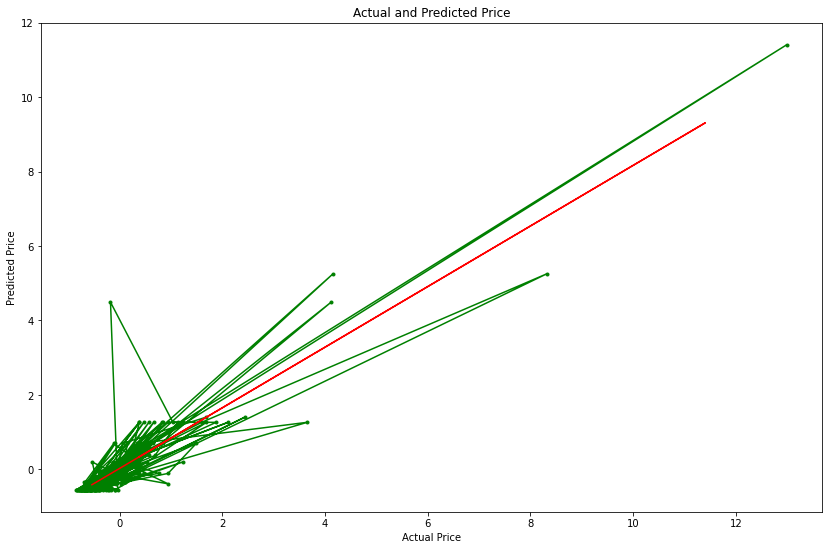

In [ ]:
a, b = np.polyfit(y_test, pred, 1)
plt.figure(figsize=(14, 9))
plt.plot(y_test, pred,marker='.', color='g')
plt.plot(pred, a*pred+b, 'r') 
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual and Predicted Price")
plt.savefig('Predicted bs actual.png')

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
print('MEA :',mean_absolute_error(y_test, pred))
print('R2  :',r2_score(y_test, pred))
print('MSE :',(mean_squared_error(y_test, pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('MAPE :',mean_absolute_percentage_error(y_test, pred))

MEA : 0.2647680131399185
R2  : 0.8283249571273916
MSE : 0.2668039910689929
RMSE : 0.5165307261615643
MAPE : 1.2507646417483793


In [ ]:
grid.best_estimator_.base_estimator_

AttributeError: ignored

In [ ]:
grid.best_estimator_.estimators_

In [ ]:
grid.best_estimator_.n_features_in_

In [ ]:
importance_gb = grid.best_estimator_.feature_importances_
importance_gb

array([0.        , 0.01123476, 0.        , 0.05758605, 0.2555345 ,
       0.01401051, 0.        , 0.        , 0.        , 0.00279992,
       0.        , 0.        , 0.        , 0.04382642, 0.05953542,
       0.01964887, 0.02265587, 0.        , 0.        , 0.        ,
       0.00354973, 0.        , 0.        , 0.        , 0.00621026,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02699334, 0.        , 0.        , 0.        ,
       0.        , 0.38588554, 0.        , 0.        , 0.06195824,
       0.        , 0.02857057, 0.        , 0.        ])

In [ ]:
X_train.columns

Index(['Number of Sim Slots', 'Ratings', 'Number Of Ratings', 'Reviews', 'RAM',
       'Storage', 'Expandable Storage', 'Expandable or Not', 'Warranty',
       'Front Camera1', 'Front Camera2', 'Number of Front Cameras',
       'Display_Size', 'Battery_(mAh)', 'Rear Camera1', 'Rear Camera2',
       'Rear Camera3', 'Rear Camera4', 'Number Of Rear Cameras',
       'FWVGA Display', 'WVGA Display', 'HVGA Display', 'Normal Display',
       'HD Display', 'Full HD Display', 'quarter HD Display', 'HD+ Display',
       'NA Display', 'FWVGA+ Display', 'Full HD+ Display', 'QVGA Display',
       'Quad HD+ Display', 'Full HD+ AMOLED Display',
       'Full HD+ Super AMOLED Display', 'Retina Display', 'Retina HD Display',
       'Super Retina XDR Display', 'Full HD+ E3 Super AMOLED Display',
       'Liquid Retina HD Display', 'Quad HD Display', '5G', 'Android',
       'Windows', 'iOS'],
      dtype='object')

In [ ]:
columns = X_train.columns
#Combine columns with feature importances
gbGraph = pd.Series(importance_gb, columns)
gbGraph

Number of Sim Slots                 0.000000
Ratings                             0.011235
Number Of Ratings                   0.000000
Reviews                             0.057586
RAM                                 0.255534
Storage                             0.014011
Expandable Storage                  0.000000
Expandable or Not                   0.000000
Warranty                            0.000000
Front Camera1                       0.002800
Front Camera2                       0.000000
Number of Front Cameras             0.000000
Display_Size                        0.000000
Battery_(mAh)                       0.043826
Rear Camera1                        0.059535
Rear Camera2                        0.019649
Rear Camera3                        0.022656
Rear Camera4                        0.000000
Number Of Rear Cameras              0.000000
FWVGA Display                       0.000000
WVGA Display                        0.003550
HVGA Display                        0.000000
Normal Dis

In [ ]:
gbGraph.sort_values()

Number of Sim Slots                 0.000000
Normal Display                      0.000000
HD Display                          0.000000
quarter HD Display                  0.000000
HD+ Display                         0.000000
NA Display                          0.000000
FWVGA+ Display                      0.000000
Full HD+ Display                    0.000000
QVGA Display                        0.000000
Full HD+ AMOLED Display             0.000000
Full HD+ Super AMOLED Display       0.000000
Retina Display                      0.000000
Retina HD Display                   0.000000
Full HD+ E3 Super AMOLED Display    0.000000
Liquid Retina HD Display            0.000000
5G                                  0.000000
Windows                             0.000000
FWVGA Display                       0.000000
HVGA Display                        0.000000
Rear Camera4                        0.000000
Number Of Ratings                   0.000000
Expandable Storage                  0.000000
Expandable

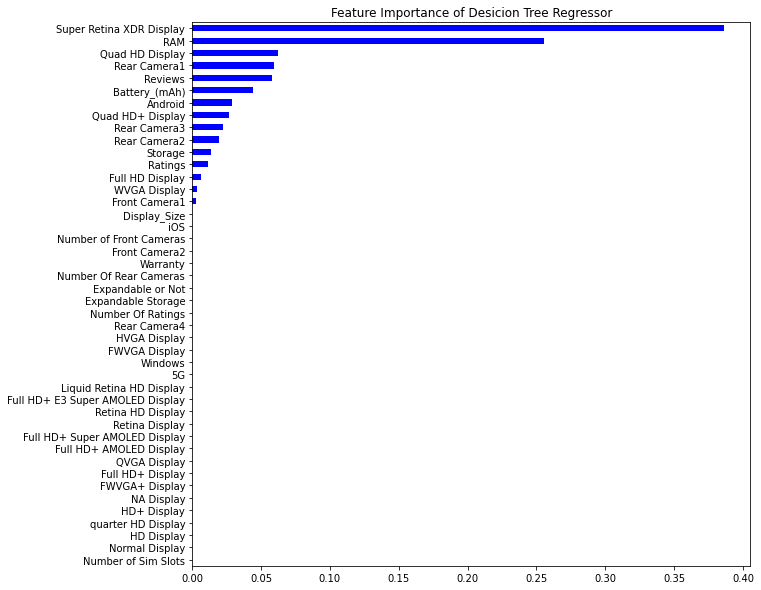

In [ ]:
# Visualizing importance from our model

from matplotlib.pyplot import figure
figure(figsize = (10,10))
gbGraph.sort_values().plot.barh(color='b')
plt.title('Feature Importance of Desicion Tree Regressor')
plt.savefig('Feature Importance.png')

In [ ]:
df1.columns


Index(['Number of Sim Slots', 'Ratings', 'Number Of Ratings', 'Reviews', 'RAM',
       'Storage', 'Expandable Storage', 'Expandable or Not', 'Warranty',
       'Price', 'Front Camera1', 'Front Camera2', 'Number of Front Cameras',
       'Display_Size', 'Battery_(mAh)', 'Rear Camera1', 'Rear Camera2',
       'Rear Camera3', 'Rear Camera4', 'Number Of Rear Cameras',
       'FWVGA Display', 'WVGA Display', 'HVGA Display', 'Normal Display',
       'HD Display', 'Full HD Display', 'quarter HD Display', 'HD+ Display',
       'NA Display', 'FWVGA+ Display', 'Full HD+ Display', 'QVGA Display',
       'Quad HD+ Display', 'Full HD+ AMOLED Display',
       'Full HD+ Super AMOLED Display', 'Retina Display', 'Retina HD Display',
       'Super Retina XDR Display', 'Full HD+ E3 Super AMOLED Display',
       'Liquid Retina HD Display', 'Quad HD Display', '5G', 'Android',
       'Windows', 'iOS', 'Price Range'],
      dtype='object')

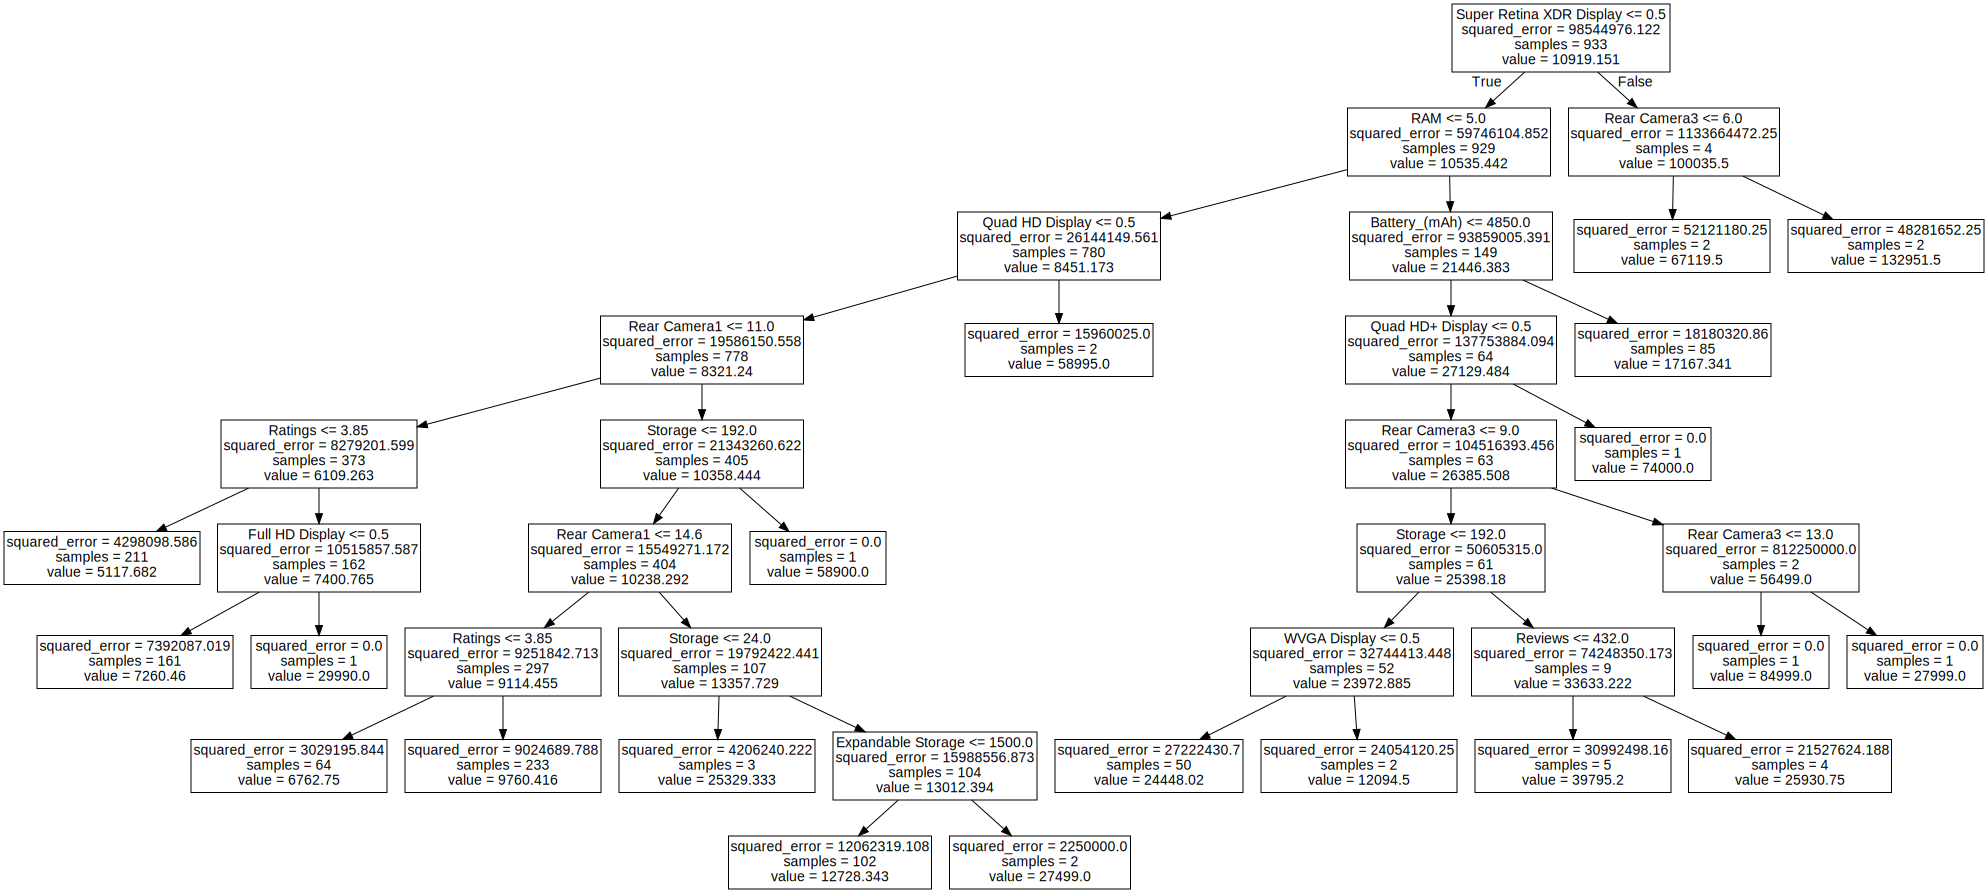

In [ ]:
from IPython.display import display
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz


display(graphviz.Source(export_graphviz(grid.best_estimator_, feature_names=['Number of Sim Slots', 'Ratings', 'Number Of Ratings', 'Reviews', 'RAM',
       'Storage', 'Expandable Storage', 'Expandable or Not', 'Warranty',
       'Front Camera1', 'Front Camera2', 'Number of Front Cameras',
       'Display_Size', 'Battery_(mAh)', 'Rear Camera1', 'Rear Camera2',
       'Rear Camera3', 'Rear Camera4', 'Number Of Rear Cameras',
       'FWVGA Display', 'WVGA Display', 'HVGA Display', 'Normal Display',
       'HD Display', 'Full HD Display', 'quarter HD Display', 'HD+ Display',
       'NA Display', 'FWVGA+ Display', 'Full HD+ Display', 'QVGA Display',
       'Quad HD+ Display', 'Full HD+ AMOLED Display',
       'Full HD+ Super AMOLED Display', 'Retina Display', 'Retina HD Display',
       'Super Retina XDR Display', 'Full HD+ E3 Super AMOLED Display',
       'Liquid Retina HD Display', 'Quad HD Display', '5G', 'Android',
       'Windows', 'iOS'])))

### Support Vector Regression

In [ ]:
from sklearn.svm import SVR
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3, cv=6)
grid.fit(X_train, y_train)

Fitting 6 folds for each of 25 candidates, totalling 150 fits
[CV 1/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.209 total time=   0.0s
[CV 2/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.012 total time=   0.0s
[CV 3/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.075 total time=   0.0s
[CV 4/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.215 total time=   0.0s
[CV 5/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time=   0.0s
[CV 6/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.118 total time=   0.0s
[CV 1/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.483 total time=   0.0s
[CV 2/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.138 total time=   0.0s
[CV 3/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.284 total time=   0.0s
[CV 4/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.577 total time=   0.0s
[CV 5/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.103 total time=   0.0s
[CV 6/6] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=6, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVR(C=100, gamma=0.001)


In [ ]:
print("Best Parameters", grid.best_params_)
pred = grid.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)

Best Parameters {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
R2:  0.8707029797652599
Root Mean Squared Error:  0.4482670703312116


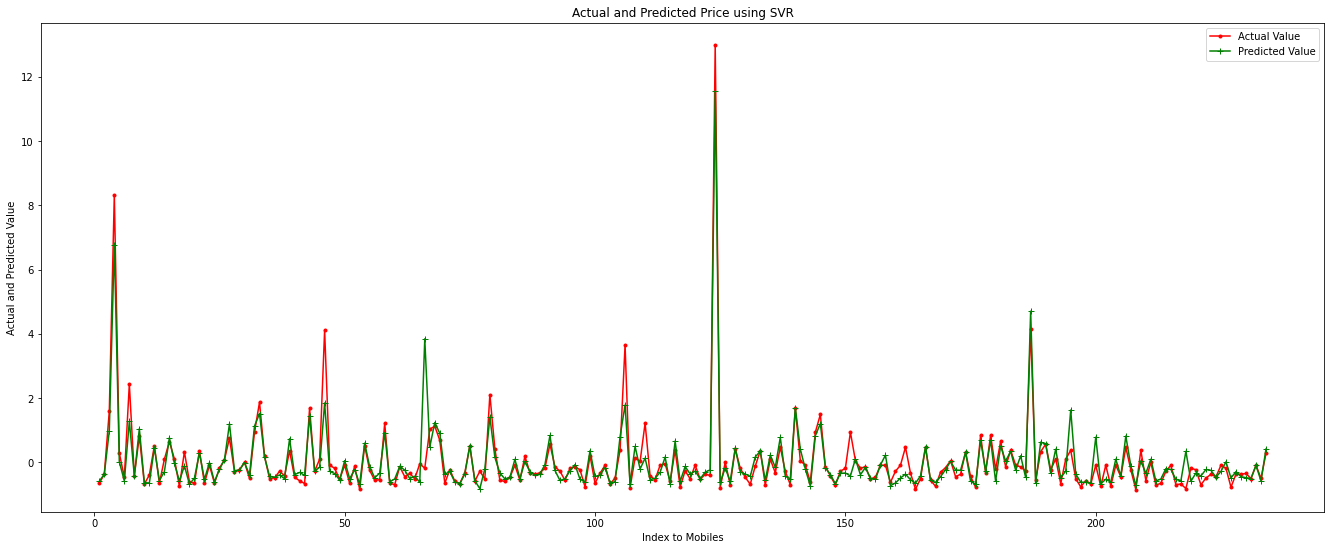

In [ ]:
# multiple lines with legend
plt.figure(figsize=(23, 9))
plt.plot(np.arange(1,235),y_test,marker='.', color='r', label= 'Actual Value')
plt.plot(np.arange(1,235),pred, marker = '+', color = 'g',label = 'Predicted Value')
plt.xlabel("Index to Mobiles")
plt.ylabel("Actual and Predicted Value")
plt.title("Actual and Predicted Price using SVR")
plt.legend();

In [ ]:
grid.best_estimator_.fit_status_

0

In [ ]:
grid.best_estimator_.intercept_

array([1.40810117])

In [ ]:
grid.best_estimator_.n_support_

array([541], dtype=int32)

In [ ]:
grid.best_estimator_.shape_fit_

(933, 44)

In [ ]:
grid.best_estimator_.support_vectors_

array([[ 0.08966531,  1.03141741,  5.25315116, ...,  0.13204844,
        -0.06559669, -0.11410887],
       [ 0.08966531,  0.79945285,  1.98604259, ...,  0.13204844,
        -0.06559669, -0.11410887],
       [ 0.08966531,  1.26338197,  0.51183545, ...,  0.13204844,
        -0.06559669, -0.11410887],
       ...,
       [ 0.08966531,  0.33552372, -0.27373633, ...,  0.13204844,
        -0.06559669, -0.11410887],
       [ 0.08966531, -0.59233453, -0.28453245, ...,  0.13204844,
        -0.06559669, -0.11410887],
       [ 0.08966531,  0.10355916, -0.2674038 , ...,  0.13204844,
        -0.06559669, -0.11410887]])

### Catboost Regressor

In [ ]:
pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
CBR = CatBoostRegressor()
CBR.get_params()   

{'loss_function': 'RMSE'}

In [ ]:
parameters = {'depth': [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
                 }
grid = GridSearchCV(estimator=CBR, param_grid = parameters, cv = 10, n_jobs=-1)
grid.fit(X_train, y_train)
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

0:	learn: 0.8955432	total: 47.7ms	remaining: 4.72s
1:	learn: 0.8534800	total: 49.5ms	remaining: 2.42s
2:	learn: 0.8213586	total: 50.7ms	remaining: 1.64s
3:	learn: 0.7874617	total: 52ms	remaining: 1.25s
4:	learn: 0.7547611	total: 53.2ms	remaining: 1.01s
5:	learn: 0.7292934	total: 54.6ms	remaining: 856ms
6:	learn: 0.7040434	total: 55.7ms	remaining: 740ms
7:	learn: 0.6812010	total: 57ms	remaining: 655ms
8:	learn: 0.6602168	total: 58.3ms	remaining: 589ms
9:	learn: 0.6451840	total: 59.6ms	remaining: 536ms
10:	learn: 0.6228702	total: 60.9ms	remaining: 492ms
11:	learn: 0.6029196	total: 62.1ms	remaining: 456ms
12:	learn: 0.5897135	total: 63.3ms	remaining: 424ms
13:	learn: 0.5753631	total: 64.5ms	remaining: 396ms
14:	learn: 0.5574573	total: 65.7ms	remaining: 372ms
15:	learn: 0.5444490	total: 66.9ms	remaining: 351ms
16:	learn: 0.5311563	total: 68.1ms	remaining: 333ms
17:	learn: 0.5204266	total: 69.3ms	remaining: 316ms
18:	learn: 0.5072396	total: 70.5ms	remaining: 301ms
19:	learn: 0.4964099	total

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
pred = grid.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)

{'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
0.7154229456159195
R2:  0.8654386031714087
Root Mean Squared Error:  0.4573017064770384


### Gradient Tree Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
search_grid={'n_estimators':[500],'max_depth':[1,2,4],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='r2',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'max_depth': [1, 2, 4], 'n_estimators': [500],
                         'random_state': [1]},
             scoring='r2')

In [ ]:
print(search.best_params_)
print(search.best_score_)
pred = search.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)

{'max_depth': 4, 'n_estimators': 500, 'random_state': 1}
0.7292707879695719
R2:  0.8697536186290116
Root Mean Squared Error:  0.4499097571041464


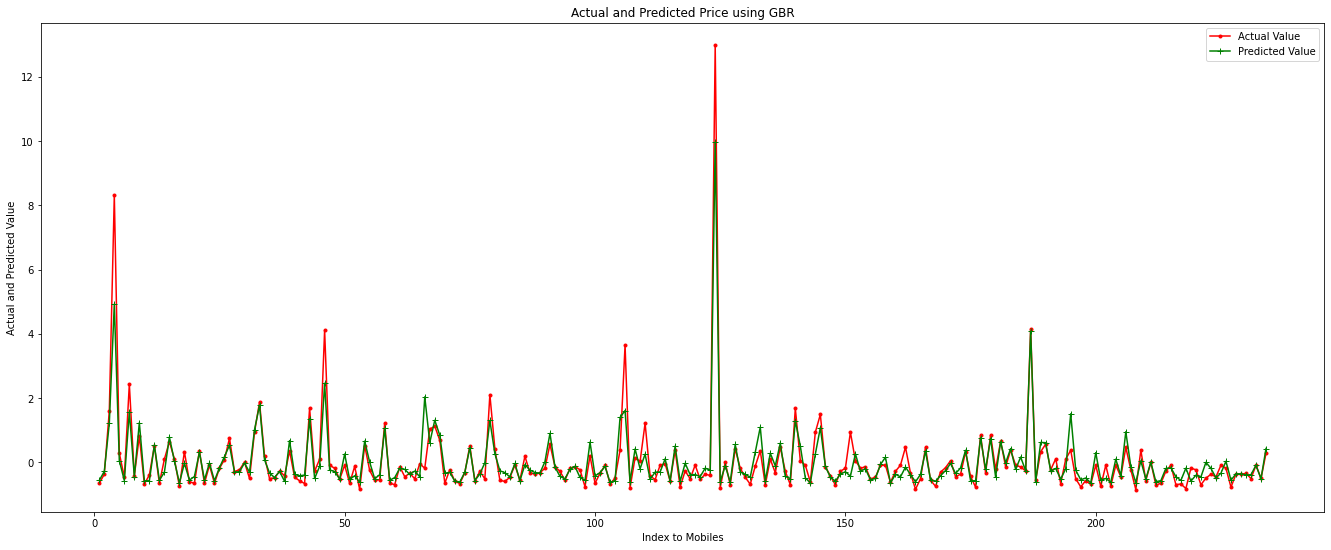

In [ ]:
# multiple lines with legend
plt.figure(figsize=(23, 9))
plt.plot(np.arange(1,235),y_test,marker='.', color='r', label= 'Actual Value')
plt.plot(np.arange(1,235),pred, marker = '+', color = 'g',label = 'Predicted Value')
plt.xlabel("Index to Mobiles")
plt.ylabel("Actual and Predicted Value")
plt.title("Actual and Predicted Price using GBR")
plt.legend();

In [ ]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)
pred = GBR.predict(X_test)

In [ ]:
importance_gb = GBR.feature_importances_
importance_gb

array([5.48106282e-03, 5.04811554e-02, 3.14318593e-02, 2.38501122e-02,
       1.54057967e-01, 1.06334474e-01, 1.53258168e-03, 9.60894358e-04,
       2.09913826e-04, 1.68324025e-02, 6.14911885e-04, 7.85295996e-05,
       4.40974428e-03, 3.13381297e-02, 4.85494748e-02, 3.04537527e-02,
       1.27050836e-01, 2.60701649e-05, 4.36847577e-03, 4.31945869e-06,
       0.00000000e+00, 0.00000000e+00, 3.46555344e-04, 1.76755713e-04,
       4.70173290e-03, 0.00000000e+00, 4.73264531e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.16194400e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50975243e-03,
       2.06932323e-01, 0.00000000e+00, 0.00000000e+00, 5.10899609e-02,
       5.26074059e-03, 2.09646341e-02, 1.32113249e-04, 4.67260599e-02])

In [ ]:
X_train.columns

Index(['Number of Sim Slots', 'Ratings', 'Number Of Ratings', 'Reviews', 'RAM',
       'Storage', 'Expandable Storage', 'Expandable or Not', 'Warranty',
       'Front Camera1', 'Front Camera2', 'Number of Front Cameras',
       'Display_Size', 'Battery_(mAh)', 'Rear Camera1', 'Rear Camera2',
       'Rear Camera3', 'Rear Camera4', 'Number Of Rear Cameras',
       'FWVGA Display', 'WVGA Display', 'HVGA Display', 'Normal Display',
       'HD Display', 'Full HD Display', 'quarter HD Display', 'HD+ Display',
       'NA Display', 'FWVGA+ Display', 'Full HD+ Display', 'QVGA Display',
       'Quad HD+ Display', 'Full HD+ AMOLED Display',
       'Full HD+ Super AMOLED Display', 'Retina Display', 'Retina HD Display',
       'Super Retina XDR Display', 'Full HD+ E3 Super AMOLED Display',
       'Liquid Retina HD Display', 'Quad HD Display', '5G', 'Android',
       'Windows', 'iOS'],
      dtype='object')

In [ ]:
columns = X_train.columns
#Combine columns with feature importances
gbGraph = pd.Series(importance_gb, columns)
gbGraph

In [ ]:
# Visualizing importance from our model

from matplotlib.pyplot import figure
figure(figsize = (10,10))
gbGraph.sort_values().plot.barh(color='b')
plt.title('Feature Importance')

### Conclusion

|Algorithm| R^2         | RMSE        |
|---------| ----------- | ----------- |
|  Random Forest Regressor  |  87.83  |  0.434  |
|  Gradient Tree Boosting  |  86.97  |  0.449 |
|  Cat Boost Regressor  |  86.54  |  0.457  |
|      Decision Tree Regressor    | 82.53   | 0.521       |
|  Support Vector Regressor  |  44.9  |  0.925  |
| Linear Regression         | -2.29      | 1890084119.8       |

## Classification

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
log = LogisticRegression()
log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#C = [1,2,4]
#fit_intercept = [True, False]
max_iter = [100, 150, 200, 250]
n_jobs = [-1]
#solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid = {'n_jobs':n_jobs
             }
grid = GridSearchCV(estimator=log, 
                    param_grid=param_grid, 
                    cv = 10)
grid.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, f1_score
print("Best Parameters", grid.best_params_)
print("Best Parameters", grid.best_score_)

Best Parameters {'n_jobs': -1}
Best Parameters 0.6538549530999772


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.6965811965811965
F1 Score:  0.6899854260641296
Precision:  0.6919988050128953
Recall:  0.6965811965811965


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
param_grid = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'n_neighbors':[4, 5, 7, 9, 10],
              'weights':['uniform', 'distance']
             }
grid = GridSearchCV(estimator=KNN, 
                    param_grid=param_grid, 
                    cv = 10,
                   scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters", grid.best_params_)
print("Best Parameters", grid.best_score_)

Best Parameters {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Best Parameters 0.624914207275223


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.6794871794871795
F1 Score:  0.6761062063299909
Precision:  0.6799196174196175
Recall:  0.6794871794871795


### Naive  Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
GNB.fit(X_train, y_train)
pred = GNB.predict(X_test)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.5683760683760684
F1 Score:  0.5271675049677158
Precision:  0.585687022466792
Recall:  0.5683760683760684


### Desicion Tree Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
np.any(np.isnan(df1['Price Range']))

False

In [ ]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'max_depth':[2, 5, 10, 15, 20, 25, 50],
              'max_leaf_nodes':[2, 5, 10, 15, 20, None]
             }
grid = GridSearchCV(estimator=DTC, 
                    param_grid=param_grid, 
                    cv = 9,
                   scoring='accuracy')
grid.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, f1_score
print("Best Parameters", grid.best_params_)
print("Best Parameters", grid.best_score_)

Best Parameters {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': None, 'splitter': 'best'}
Best Parameters 0.6398327939590076


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.6111111111111112
F1 Score:  0.6112512032524934
Precision:  0.6132354583571282
Recall:  0.6111111111111112


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
SVC = SVC()
SVC.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
SVC.fit(X_train, y_train)
pred = SVC.predict(X_test)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.6709401709401709
F1 Score:  0.6635922494835648
Precision:  0.6734538860327007
Recall:  0.6709401709401709


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {'criterion':['gini', 'entropy', 'log_loss'],
              'max_depth':[20, 25],
              'n_jobs':[-1]
             }
grid = GridSearchCV(estimator=RFC, 
                    param_grid=param_grid, 
                    cv = 8,
                   scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters", grid.best_params_)
print("Best Parameters", grid.best_score_)

Best Parameters {'criterion': 'gini', 'max_depth': 20, 'n_jobs': -1}
Best Parameters 0.6783819628647214


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.6666666666666666
F1 Score:  0.664381109435698
Precision:  0.6683075115280736
Recall:  0.6666666666666666


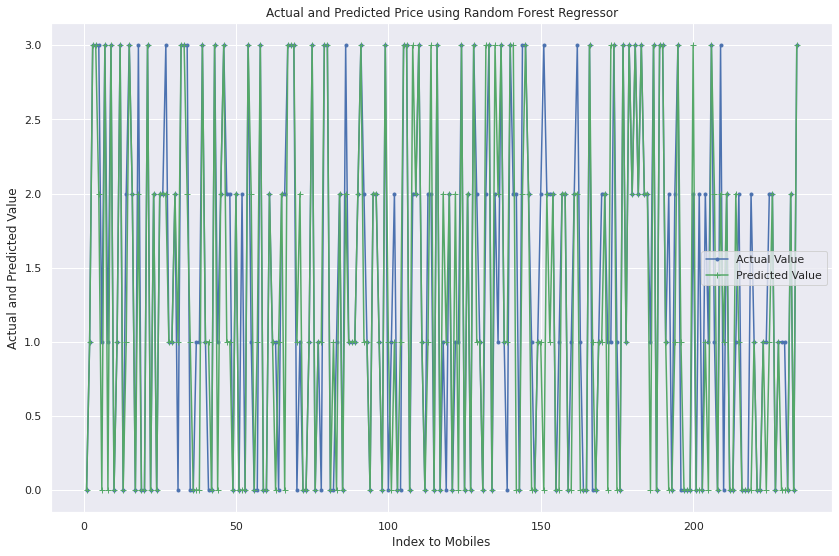

In [ ]:
# multiple lines with legend
plt.figure(figsize=(14, 9))
plt.plot(np.arange(1,235),y_test,marker='.', color='b', label= 'Actual Value')
plt.plot(np.arange(1,235),pred, marker = '+', color = 'g',label = 'Predicted Value')
plt.xlabel("Index to Mobiles")
plt.ylabel("Actual and Predicted Value")
plt.title("Actual and Predicted Price using Random Forest Regressor")
plt.legend();
plt.savefig('Actual and predicted.png')

Text(0.5, 0, 'Index to Mobiles')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

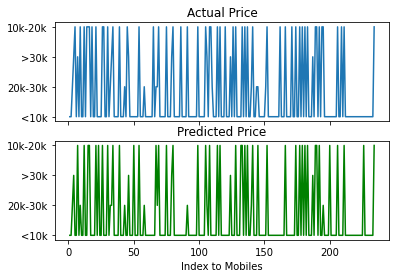

In [ ]:
fig = plt.figure()
plt.figure(figsize=(20,20))
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(np.arange(1,235), y_test)
ax2.plot(np.arange(1,235), pred, 'g')
ax1.set_title("Actual Price")
ax2.set_title("Predicted Price")
plt.xlabel("Index to Mobiles")

In [ ]:
a, b = np.polyfit(y_test, pred, 1)
plt.figure(figsize=(14, 9))
plt.plot(y_test, pred,marker='.', color='g')
plt.plot(pred, a*pred+b, 'r') 
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual and Predicted Price")
plt.savefig('Predicted bs actual.png')

TypeError: ignored

#### Best Estimator

In [ ]:
grid.best_estimator_.base_estimator_

DecisionTreeClassifier()

In [ ]:
grid.best_estimator_.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                        random_state=403276466),
 DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                        random_state=1541394618),
 DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                        random_state=414304212),
 DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                        random_state=1367246410),
 DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                        random_state=1036634566),
 DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                        random_state=1123847433),
 DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                        random_state=998701515),
 DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
             

In [ ]:
grid.best_estimator_.n_features_in_

44

In [ ]:
importance_gb = grid.best_estimator_.feature_importances_
importance_gb

array([7.23512942e-03, 6.50467767e-02, 6.24671278e-02, 6.10321778e-02,
       1.14217729e-01, 1.30394709e-01, 3.78844100e-02, 1.61891773e-02,
       3.68397280e-03, 7.58067391e-02, 3.29541147e-03, 4.48332016e-03,
       6.56015173e-02, 6.42027963e-02, 8.89058246e-02, 3.65284626e-02,
       3.97342422e-02, 5.34780552e-03, 2.51057411e-02, 1.73289018e-03,
       1.35300023e-03, 9.10390825e-05, 7.28448845e-03, 6.61473378e-03,
       8.16637649e-03, 1.11454021e-03, 1.27168441e-02, 8.08274091e-04,
       1.28813638e-05, 1.35292441e-02, 1.21378303e-06, 6.67606996e-04,
       1.62399523e-03, 1.26895597e-04, 0.00000000e+00, 3.35258951e-03,
       1.30135392e-03, 4.01456507e-04, 0.00000000e+00, 3.24595689e-03,
       1.12302603e-02, 8.78833034e-03, 7.80781831e-04, 7.89217745e-03])

In [ ]:
columns = X_train.columns
#Combine columns with feature importances
gbGraph = pd.Series(importance_gb, columns)
gbGraph

Number of Sim Slots                 0.007235
Ratings                             0.065047
Number Of Ratings                   0.062467
Reviews                             0.061032
RAM                                 0.114218
Storage                             0.130395
Expandable Storage                  0.037884
Expandable or Not                   0.016189
Warranty                            0.003684
Front Camera1                       0.075807
Front Camera2                       0.003295
Number of Front Cameras             0.004483
Display_Size                        0.065602
Battery_(mAh)                       0.064203
Rear Camera1                        0.088906
Rear Camera2                        0.036528
Rear Camera3                        0.039734
Rear Camera4                        0.005348
Number Of Rear Cameras              0.025106
FWVGA Display                       0.001733
WVGA Display                        0.001353
HVGA Display                        0.000091
Normal Dis

Text(0.5, 1.0, 'Feature Importance')

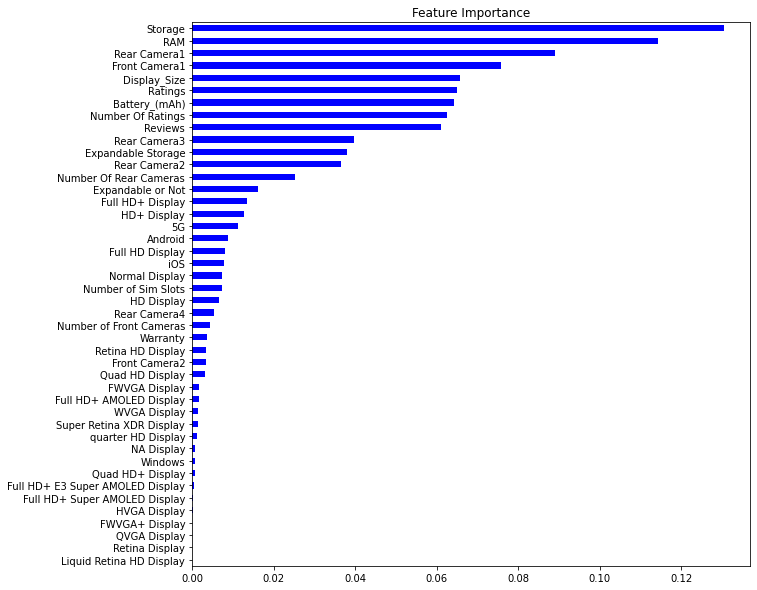

In [ ]:
# Visualizing importance from our model

from matplotlib.pyplot import figure
figure(figsize = (10,10))
gbGraph.sort_values().plot.barh(color='b')
plt.title('Feature Importance')

In [ ]:
len(grid.best_estimator_.estimators_)

100

In [ ]:
# first decision tree of the random forest
grid.best_estimator_.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       random_state=403276466)

In [ ]:
#We can plot a first Decision Tree from the Random Forest
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(grid.best_estimator_.estimators_[0], feature_names=X_train.columns, filled=True, fontsize=8)
plt.savefig('First Decision Tree.png')

NameError: ignored

In [ ]:
run_classifier(RFR, param_grid, 'Random Forest')

NameError: ignored

# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
%%time
param_grid = {'n_estimators':[20, 30, 40, 50, 60],
              'algorithm':['SAMME', 'SAMME.R']
             }
grid = GridSearchCV(estimator=ABC, 
                    param_grid=param_grid, 
                    cv = 9,
                   scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters", grid.best_params_)
print("Best Parameters", grid.best_score_)

Best Parameters {'algorithm': 'SAMME', 'n_estimators': 40}
Best Parameters 0.6313791386606921
CPU times: user 8.58 s, sys: 47 ms, total: 8.63 s
Wall time: 8.83 s


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.6282051282051282
F1 Score:  0.6249683153290007
Precision:  0.6340865562249292
Recall:  0.6282051282051282


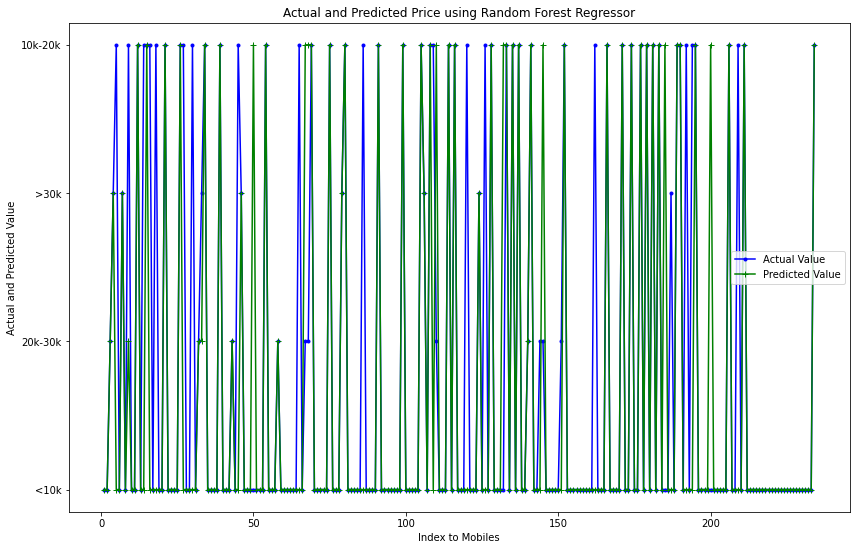

In [ ]:
# multiple lines with legend
plt.figure(figsize=(14, 9))
plt.plot(np.arange(1,235),y_test,marker='.', color='b', label= 'Actual Value')
plt.plot(np.arange(1,235),pred, marker = '+', color = 'g',label = 'Predicted Value')
plt.xlabel("Index to Mobiles")
plt.ylabel("Actual and Predicted Value")
plt.title("Actual and Predicted Price using Random Forest Regressor")
plt.legend();
plt.savefig('Actual and predicted.png')

Text(0.5, 0, 'Index to Mobiles')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

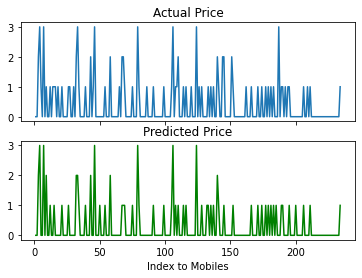

In [ ]:
fig = plt.figure()
plt.figure(figsize=(20,20))
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(np.arange(1,235), y_test)
ax2.plot(np.arange(1,235), pred, 'g')
ax1.set_title("Actual Price")
ax2.set_title("Predicted Price")
plt.xlabel("Index to Mobiles")

In [ ]:
grid.best_estimator_.base_estimator_

DecisionTreeClassifier(max_depth=1)

In [ ]:
grid.best_estimator_.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=1326250333),
 DecisionTreeClassifier(max_depth=1, random_state=1957797341),
 DecisionTreeClassifier(max_depth=1, random_state=1501440513),
 DecisionTreeClassifier(max_depth=1, random_state=1831798194),
 DecisionTreeClassifier(max_depth=1, random_state=1256267016),
 DecisionTreeClassifier(max_depth=1, random_state=1621198702),
 DecisionTreeClassifier(max_depth=1, random_state=447159052),
 DecisionTreeClassifier(max_depth=1, random_state=1425573358),
 DecisionTreeClassifier(max_depth=1, random_state=1775312901),
 DecisionTreeClassifier(max_depth=1, random_state=1198264934),
 DecisionTreeClassifier(max_depth=1, random_state=852762482),
 DecisionTreeClassifier(max_depth=1, random_state=1345329154),
 DecisionTreeClassifier(max_depth=1, random_state=2086221808),
 DecisionTreeClassifier(max_depth=1, random_state=292348565),
 DecisionTreeClassifier(max_depth=1, random_state=1639863921),
 DecisionTreeClassifier(max_depth=1, random_state=58789426

In [ ]:
grid.best_estimator_.n_features_in_

44

In [ ]:
importance_gb = grid.best_estimator_.feature_importances_
importance_gb

array([0.        , 0.09189687, 0.        , 0.        , 0.17073132,
       0.11420922, 0.        , 0.07894111, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05892664, 0.17654151,
       0.05061862, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02890276,
       0.        , 0.0798511 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10023231,
       0.        , 0.        , 0.        , 0.04914855])

In [ ]:
columns = X_train.columns
#Combine columns with feature importances
gbGraph = pd.Series(importance_gb, columns)
gbGraph

Number of Sim Slots                 0.000000
Ratings                             0.091897
Number Of Ratings                   0.000000
Reviews                             0.000000
RAM                                 0.170731
Storage                             0.114209
Expandable Storage                  0.000000
Expandable or Not                   0.078941
Warranty                            0.000000
Front Camera1                       0.000000
Front Camera2                       0.000000
Number of Front Cameras             0.000000
Display_Size                        0.000000
Battery_(mAh)                       0.058927
Rear Camera1                        0.176542
Rear Camera2                        0.050619
Rear Camera3                        0.000000
Rear Camera4                        0.000000
Number Of Rear Cameras              0.000000
FWVGA Display                       0.000000
WVGA Display                        0.000000
HVGA Display                        0.000000
Normal Dis

Text(0.5, 1.0, 'Feature Importance')

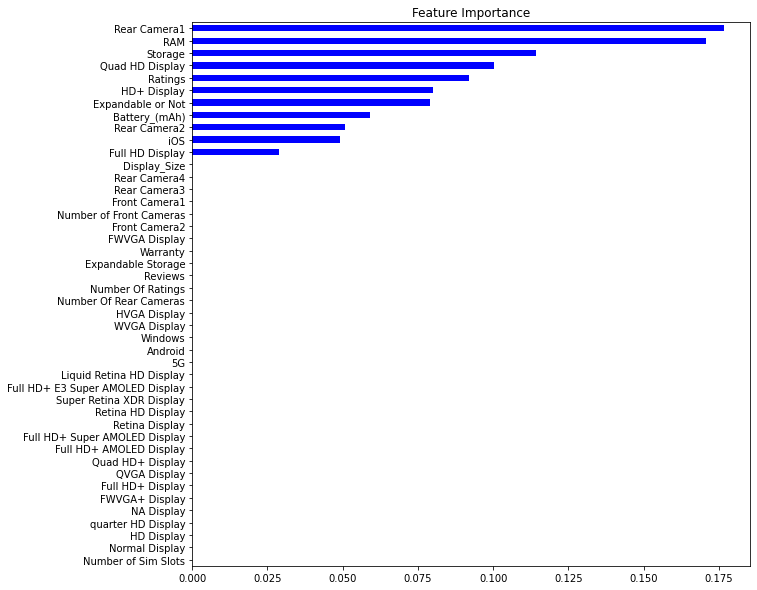

In [ ]:
# Visualizing importance from our model

from matplotlib.pyplot import figure
figure(figsize = (10,10))
gbGraph.sort_values().plot.barh(color='b')
plt.title('Feature Importance')

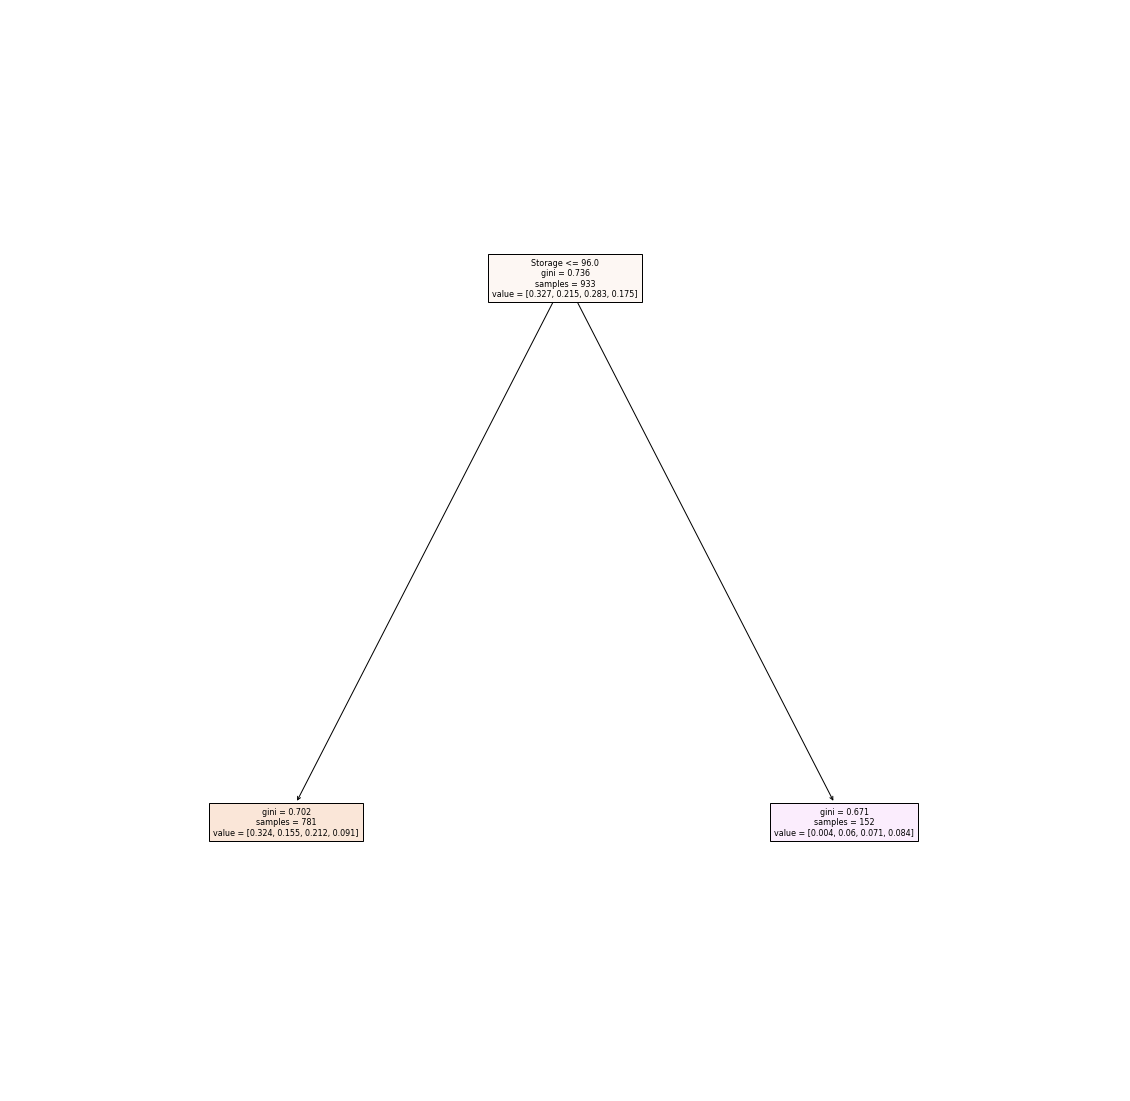

In [ ]:
#We can plot a first Decision Tree from the Random Forest
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(grid.best_estimator_.estimators_[20], feature_names=X_train.columns, filled=True, fontsize=8)
plt.savefig('First Decision Tree.png')

|Algorithm| Accuracy        | 
|---------| ----------- | 
|  Logistic Regression  |  74.35 | 
|  KNN  | 72.64 |  
|  Naive Bayes  |  78.2  |  
|      Decision Tree     | 85.04   | 
|  Random Forest Classifier  |  85.89 |
| Support Vector Machine    | 69.65 |
| Ada Boost Classifier      | 87.6  |

## **DEEP LEARNING**

In [ ]:
X = df1.drop(['Price', 'Price Range'],axis=1)
y = df1['Price Range']
from sklearn.preprocessing import LabelEncoder
y = pd.get_dummies(y).values
print(y[0:5])

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# import deep learning libraries
import tensorflow as tf
from tensorflow import keras
import keras
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.utils import np_utils

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
  ])
model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=50, epochs=10000)

Streaming output truncated to the last 5000 lines.
19/19 [==============================] - 0s 4ms/step - loss: 0.7007 - accuracy: 0.6999
Epoch 7502/10000
19/19 [==============================] - 0s 4ms/step - loss: 0.8459 - accuracy: 0.6817
Epoch 7503/10000
19/19 [==============================] - 0s 4ms/step - loss: 0.7720 - accuracy: 0.7010
Epoch 7504/10000
19/19 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.7010
Epoch 7505/10000
19/19 [==============================] - 0s 4ms/step - loss: 0.7682 - accuracy: 0.6731
Epoch 7506/10000
19/19 [==============================] - 0s 4ms/step - loss: 0.7144 - accuracy: 0.6924
Epoch 7507/10000
19/19 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.6988
Epoch 7508/10000
19/19 [==============================] - 0s 4ms/step - loss: 0.7051 - accuracy: 0.6913
Epoch 7509/10000
19/19 [==============================] - 0s 4ms/step - loss: 0.7199 - accuracy: 0.7010
Epoch 7510/10000
19/19 [======

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.0058772563934326
Test accuracy: 0.5769230723381042
